## Lead Scoring Case Study
By **Sai Vamsy Dhulipala**

## Problem Statement

An education company named **X Education sells online courses** to industry professionals.

Although X Education gets a lot of leads, its **lead conversion rate is very poor**. The typical lead conversion rate at X education is **around 30%**.

To make this process more efficient, the company wishes to **identify the most potential leads, also known as ‘Hot Leads’**. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Data Preperation

### Importing libraries

**Importing libraries for data analysis**

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",50,"display.max_colwidth",50)

**Importing libraries for data visualisation**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

**Importing libraries for machine learning**

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

**Suppressing warnings**

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

### Importing and inspecting the dataset

**Importing the dataset**

In [6]:
data = pd.read_csv("Leads.csv")

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**<span style = "color:green">Upon inspecting the dataset, we find that some of values are `Select`, which means that the user has failed to fill that particular field while filling the form, and hence, by default it is taken as Select. Hence, replacing the same with `Null` values.</span>**

**Finding `Select` in each column**

In [7]:
(data=="Select").sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

**Replacing `Select` with `Null` values**

In [8]:
data.replace({"Select":np.nan},inplace=True)

**Understanding the shape and structure**

In [9]:
data.shape

(9240, 37)

In [10]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**<span style = "color:green">We find that some of the columns have missing values. Hence, there is a need for appropiate treatment of such missing values.</span>**

### Imputing missing values

**Finding columns having missing values**

In [11]:
na_cols = data.isna().mean().round(4)*100
na_cols = na_cols[na_cols!=0]
na_cols

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
City                                             39.71
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64

**Dropping columns having more than 40% of missing values**

In [12]:
high_na_cols = na_cols[na_cols>=40]
high_na_cols

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [13]:
data.drop(high_na_cols.index,axis=1,inplace=True)

**Finding the balance columns having missing values**

In [14]:
bal_na_cols = na_cols.drop(high_na_cols.index)
bal_na_cols

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
City                                             39.71
dtype: float64

**Finding the datatypes of those columns**

In [15]:
col_dtypes = data.dtypes[bal_na_cols.index]
col_dtypes

Lead Source                                       object
TotalVisits                                      float64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Tags                                              object
City                                              object
dtype: object

**<span style = "color:green">We can observe that there are only 2 datatypes, i.e., `float` meaning a `continuous varable` and `object` meaning a `categorical variable`. `Median` is an appropriate value for imputation for `continuous variable` and `Mode` is an appropriate value for imputation for `categorical variable`.</span>**

**Imputing the missing values with the respective values as described above**

In [16]:
for col in bal_na_cols.index:
    if data[col].dtypes == float:
        data[col].fillna(data[col].median(),inplace=True)
    else:
        data[col].fillna(data[col].mode()[0],inplace=True)

In [17]:
data.isna().sum().sum() == 0

True

### Inspecting and transforming the variables

**1. `Prospect ID` and `Lead Number`**

In [18]:
data["Prospect ID"].is_unique

True

In [19]:
data["Lead Number"].is_unique

True

**<span style = "color:green">Since both the variables are unique, it is better to drop the `Prospect ID` as `Lead Number` would act as a better identifier of each observation.</span>**

**Dropping `Prospect ID`**

In [20]:
data.drop("Prospect ID",axis=1,inplace=True)

**2. `Lead Origin`**

In [21]:
data["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

**<span style = "color:green">Upon observing the above values, it is better to group `Lead Add Form`, `Lead Import` and `Quick Add Form` as `Other` since they have very few observations.</span>**

**Grouping `Lead Add Form`, `Lead Import` and `Quick Add Form` as `Other`**

In [22]:
data["Lead Origin"].replace({"Lead Add Form":"Other",
                           "Lead Import":"Other","Quick Add Form":"Other"},inplace=True)

In [23]:
data["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Other                       774
Name: Lead Origin, dtype: int64

**3. `Lead Source`**

In [24]:
data["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
blog                    1
youtubechannel          1
testone                 1
Name: Lead Source, dtype: int64

**<span style = "color:green">Upon observing the above values, it is better to group the observations as follows:</span>**

- **<span style = "color:green">`Campaign` - Google, Facebook, google, bing, Click2call, Social Media, blog, WeLearn, youtubechannel, Pay per Click Ads, welearnblog_Home</span>**
- **<span style = "color:green">`Direct` - Direct Traffic</span>**
- **<span style = "color:green">`Chat` - Olark Chat, Live Chat</span>**
- **<span style = "color:green">`Search` - Organic Search</span>**
- **<span style = "color:green">`Referral` - Reference, Welingak Website, Referral Sites</span>**
- **<span style = "color:green">`Other` - Press_Release, NC_EDM, testone</span>**

**Grouping columns as stated above**

In [25]:
data["Lead Source"].replace({"Google":"Campaign", "Direct Traffic":"Direct", "Olark Chat":"Chat", 
                           "Organic Search":"Search", "Reference":"Referral", "Welingak Website":"Referral", 
                           "Referral Sites":"Referral", "Facebook":"Campaign", "bing":"Search", 
                           "google":"Campaign", "Click2call":"Campaign", "Live Chat":"Chat", 
                           "Press_Release":"Other", "Social Media":"Campaign", "blog":"Campaign", 
                           "NC_EDM":"Other", "WeLearn":"Campaign", "testone":"Other", 
                           "youtubechannel":"Campaign", "Pay per Click Ads":"Campaign", 
                           "welearnblog_Home":"Campaign"},inplace=True)

**4. `Do Not Call` and `Do Not Email`**

In [26]:
data["Do Not Call"].value_counts(normalize=True).round(4)

No     0.9998
Yes    0.0002
Name: Do Not Call, dtype: float64

In [27]:
data["Do Not Email"].value_counts(normalize=True).round(4)

No     0.9206
Yes    0.0794
Name: Do Not Email, dtype: float64

**<span style = "color:green">Since almost all the values are `No` it is better to drop both the variables.</span>**

**Dropping `Do Not Call` and `Do Not Email`**

In [28]:
data.drop(["Do Not Call","Do Not Email"],axis=1,inplace=True)

**5. `Country`**

In [29]:
data["Country"].value_counts(normalize=True).round(4)

India                   0.9689
United States           0.0075
United Arab Emirates    0.0057
Singapore               0.0026
Saudi Arabia            0.0023
United Kingdom          0.0016
Australia               0.0014
Qatar                   0.0011
Bahrain                 0.0008
Hong Kong               0.0008
France                  0.0006
Oman                    0.0006
unknown                 0.0005
Kuwait                  0.0004
Nigeria                 0.0004
Canada                  0.0004
South Africa            0.0004
Germany                 0.0004
Sweden                  0.0003
Belgium                 0.0002
Netherlands             0.0002
Philippines             0.0002
Uganda                  0.0002
Ghana                   0.0002
Italy                   0.0002
China                   0.0002
Bangladesh              0.0002
Asia/Pacific Region     0.0002
Liberia                 0.0001
Russia                  0.0001
Sri Lanka               0.0001
Kenya                   0.0001
Malaysia

**<span style = "color:green">Since 97% of the values are `India`, it doesn't make any sense to keep the variable.</span>**

**Dropping `Country`**

In [30]:
data.drop("Country",axis=1,inplace=True)

**6. `What is your current occupation`**

In [31]:
data["What is your current occupation"].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

**<span style = "color:green">Upon observing the above values, it is better to group `Housewife` and `Businessman` as `Other` since they have very few observations.</span>**

**Grouping `Housewife` and `Businessman` as `Other`. Also, renaming `Working Professional` as `Working`**

In [32]:
data["What is your current occupation"].replace({"Housewife":"Other","Businessman":"Other",
                                                        "Working Professional":"Working"},inplace=True)

**Renaming the column as `Current Occupation`**

In [33]:
data.rename(columns={"What is your current occupation":"Current Occupation"},inplace=True)

In [34]:
data["Current Occupation"].value_counts()

Unemployed    8290
Working        706
Student        210
Other           34
Name: Current Occupation, dtype: int64

**7. `What matters most to you in choosing a course`**

In [35]:
data["What matters most to you in choosing a course"].value_counts(normalize=True).round(4)

Better Career Prospects      0.9997
Flexibility & Convenience    0.0002
Other                        0.0001
Name: What matters most to you in choosing a course, dtype: float64

**<span style = "color:green">Since all the values are `Better Career Prospects`, it is better to drop the column.</span>**

**Dropping `What matters most to you in choosing a course`**

In [36]:
data.drop("What matters most to you in choosing a course",axis=1,inplace=True)

**8. `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement` and `Through Recommendations`**

In [37]:
cols = ["Search", "Magazine", "Newspaper Article", "X Education Forums", 
        "Newspaper", "Digital Advertisement", "Through Recommendations"]

for col in cols:
    print(data[col].value_counts(normalize=True).round(4),end="\n\n")

No     0.9985
Yes    0.0015
Name: Search, dtype: float64

No    1.0
Name: Magazine, dtype: float64

No     0.9998
Yes    0.0002
Name: Newspaper Article, dtype: float64

No     0.9999
Yes    0.0001
Name: X Education Forums, dtype: float64

No     0.9999
Yes    0.0001
Name: Newspaper, dtype: float64

No     0.9996
Yes    0.0004
Name: Digital Advertisement, dtype: float64

No     0.9992
Yes    0.0008
Name: Through Recommendations, dtype: float64



**<span style = "color:green">Since in all the cases the values are `No`, it is better to drop the above columns.</span>**

**Dropping `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement` and `Through Recommendations`**

In [38]:
data.drop(cols,axis=1,inplace=True)

**9. `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content` and `I agree to pay the amount through cheque`**

In [39]:
cols = ["Receive More Updates About Our Courses", "Update me on Supply Chain Content",
        "Get updates on DM Content", "I agree to pay the amount through cheque"]

for col in cols:
    print(data[col].value_counts(normalize=True).round(4),end="\n\n")

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

No    1.0
Name: Get updates on DM Content, dtype: float64

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64



**<span style = "color:green">Since in all the cases the values are `No`, it is better to drop the above columns.</span>**

**Dropping `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content` and `I agree to pay the amount through cheque`**

In [40]:
data.drop(cols,axis=1,inplace=True)

**10. `A free copy of Mastering The Interview`**

In [41]:
data["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

**<span style = "color:green">As the name of the variable is too long, it is better to rename it as `Free Ebook`.</span>**

**Renaming `A free copy of Mastering The Interview` as `Free Ebook`**

In [42]:
data.rename(columns={"A free copy of Mastering The Interview":"Free Ebook"},inplace=True)

**11. `Specialization`**

In [43]:
data["Specialization"].value_counts(normalize=True).round(4)

Finance Management                   0.4714
Human Resource Management            0.0918
Marketing Management                 0.0907
Operations Management                0.0544
Business Administration              0.0436
IT Projects Management               0.0396
Supply Chain Management              0.0378
Banking, Investment And Insurance    0.0366
Media and Advertising                0.0220
Travel and Tourism                   0.0220
International Business               0.0193
Healthcare Management                0.0172
Hospitality Management               0.0123
E-COMMERCE                           0.0121
Retail Management                    0.0108
Rural and Agribusiness               0.0079
E-Business                           0.0062
Services Excellence                  0.0043
Name: Specialization, dtype: float64

**<span style = "color:green">Upon observing the values, it is better having only 2 categories, namely `Finance` and `Other`.</span>**

**Grouping the specializations into `Finance` and `Other`**

In [44]:
data["Specialization"].replace({"Finance Management":"Finance","Human Resource Management":"Other",
                              "Marketing Management":"Other","Operations Management":"Other",
                              "Business Administration":"Other","IT Projects Management":"Other",
                              "Supply Chain Management":"Other","Banking, Investment And Insurance":"Finance",
                              "Media and Advertising":"Other","Travel and Tourism":"Other",
                              "International Business":"Other","Healthcare Management":"Other",
                              "Hospitality Management":"Other","E-COMMERCE":"Other",
                              "Retail Management":"Other","Rural and Agribusiness":"Other",
                              "E-Business":"Other","Services Excellence":"Other"},inplace=True)

In [45]:
data["Specialization"].value_counts()

Finance    4694
Other      4546
Name: Specialization, dtype: int64

**12. `City`**

In [46]:
data["City"].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

**<span style = "color:green">We can observe that most of the leads are flowing from in and around Maharashtra. Also, it would be more efficient to categorize the cities as Tier I, Tier II and Tier III. Hence creating a categorical variable `City Category` and binary variable `Maharashtra`</span>**

**Creating Variables `City Category` and `Maharashtra`. Also, dropping `City`**

In [47]:
data["Maharashtra"] = data["City"].apply(lambda x: "Yes" if x in ["Mumbai","Thane & Outskirts",
                                                              "Other Cities of Maharashtra"] else "No")

data["City Category"] = data["City"].replace(data["City"].value_counts().index,["Tier I","Tier II","Tier III",
                                                                          "Tier III","Tier I","Tier II"])

data.drop("City",axis=1,inplace=True)

In [48]:
data["Maharashtra"].value_counts()

Yes    8100
No     1140
Name: Maharashtra, dtype: int64

In [49]:
data["City Category"].value_counts()

Tier I      7271
Tier III    1143
Tier II      826
Name: City Category, dtype: int64

**13. `Tags`**

In [50]:
data["Tags"].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

**<span style = "color:green">Instead of having these many categories, the categories other than the top 5 can be grouped as `Other`.</span>**

**Grouping all miscellaneous categories as `Other`**

In [51]:
data["Tags"].replace(["switched off","Busy","Lost to EINS","Not doing further education",
                    "Interested  in full time MBA","Graduation in progress","invalid number",
                    "Diploma holder (Not Eligible)","wrong number given","opp hangup",
                    "number not provided","in touch with EINS","Lost to Others",
                    "Want to take admission but has financial problems","Still Thinking",
                    "Interested in Next batch","In confusion whether part time or DLP",
                    "Lateral student","Shall take in the next coming month","University not recognized",
                    "Recognition issue (DEC approval)"],"Other",inplace=True)

In [52]:
data["Tags"].value_counts()

Will revert after reading the email    5425
Other                                  1276
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

**14. `Last Activity` and `Last Notable Activity`**

In [53]:
data["Last Activity"].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [54]:
data["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

**<span style = "color:green">Looks like there is some relation with these 2 variables. It can be explored furter by observing the value counts in `Last Notable Activity` for each category of `Last Activity`.</span>**

In [55]:
for i in data["Last Activity"].unique():
    val = (data["Last Activity"]==i).sum()
    print(f"{i}: {val}")
    print(data[data["Last Activity"]==i]["Last Notable Activity"].value_counts(),end="\n\n")

Page Visited on Website: 640
Modified                   322
Page Visited on Website    318
Name: Last Notable Activity, dtype: int64

Email Opened: 3540
Email Opened    2827
Modified         713
Name: Last Notable Activity, dtype: int64

Unreachable: 93
Modified       61
Unreachable    32
Name: Last Notable Activity, dtype: int64

Converted to Lead: 428
Modified    428
Name: Last Notable Activity, dtype: int64

Olark Chat Conversation: 973
Modified                   790
Olark Chat Conversation    183
Name: Last Notable Activity, dtype: int64

Email Bounced: 326
Modified         266
Email Bounced     60
Name: Last Notable Activity, dtype: int64

Email Link Clicked: 267
Email Link Clicked    173
Modified               94
Name: Last Notable Activity, dtype: int64

Form Submitted on Website: 116
Modified                     115
Form Submitted on Website      1
Name: Last Notable Activity, dtype: int64

Unsubscribed: 61
Unsubscribed    47
Modified        14
Name: Last Notable Activity, dtyp

**<span style = "color:green">Upon observing the above result, we can understand that `Last Notable Activity` tracks the `Last Activity` and reports `Modified` if there is a change in the `Last Activity` else it takes the same value as in the `Last Activity`.</span>**

**<span style = "color:green">Hence, it is better to have a binary variable `Last Activity Modified` which tracks wheter there is any change in the `Last Activity`.</span>**

**Creating a binary variable `Last Activity Modified` and dropping `Last Notable Activity`**

In [56]:
data["Last Activity Modified"] = data["Last Notable Activity"].apply(lambda x: 
                                                                     "Yes" if x == "Modified" else "No")

data.drop("Last Notable Activity",axis=1,inplace=True)

In [57]:
data["Last Activity Modified"].value_counts()

No     5833
Yes    3407
Name: Last Activity Modified, dtype: int64

In [58]:
data["Last Activity"].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

**<span style = "color:green">Instead of having these many categories, the categories other than the top 5 can be grouped as `Other`.</span>**

**Grouping all miscellaneous categories as `Other`**

In [59]:
data["Last Activity"].replace(["Email Bounced","Email Link Clicked","Form Submitted on Website",
                             "Unreachable","Unsubscribed","Had a Phone Conversation",
                             "Approached upfront","View in browser link Clicked","Email Received",
                             "Email Marked Spam","Visited Booth in Tradeshow",
                             "Resubscribed to emails","Converted"],"Other",inplace=True)

In [60]:
data["Last Activity"].value_counts()

Email Opened               3540
SMS Sent                   2745
Olark Chat Conversation     973
Other                       914
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

**15. `TotalVisits`, `Total Time Spent on Website` and `Page Views Per Visit`**

**<span style = "color:green">Logically, `Total Time Spent on Website` can be given as:</span>**

<span style = "color:green">$$Total \space Time \space Spent \space on \space Website = Total \space Visits \space \times Page \space Views \space Per \space Visit \space \times Time \space Spent \space on \space each \space Page$$</span>

**<span style = "color:green">Instead of having multipe variables, it is better to have a single variable `Total Time Spent on Website` which explains the impact of all the variables.</span>**

**Dropping `TotalVisits` and `Page Views Per Visit`**

In [61]:
data.drop(["TotalVisits","Page Views Per Visit"],axis=1,inplace=True)

**Reinspecting the dataset**

In [62]:
data.head()

,Lead Number,Lead Origin,Lead Source,Converted,Total Time Spent on Website,Last Activity,Specialization,Current Occupation,Tags,Free Ebook,Maharashtra,City Category,Last Activity Modified
0,660737,API,Chat,0,0,Page Visited on Website,Finance,Unemployed,Interested in other courses,No,Yes,Tier I,Yes
1,660728,API,Search,0,674,Email Opened,Finance,Unemployed,Ringing,No,Yes,Tier I,No
2,660727,Landing Page Submission,Direct,1,1532,Email Opened,Other,Student,Will revert after reading the email,Yes,Yes,Tier I,No
3,660719,Landing Page Submission,Direct,0,305,Other,Other,Unemployed,Ringing,No,Yes,Tier I,Yes
4,660681,Landing Page Submission,Campaign,1,1428,Converted to Lead,Finance,Unemployed,Will revert after reading the email,No,Yes,Tier I,Yes


In [63]:
data.shape

(9240, 13)

**From 37 columns initally, the shape of the dataset has come down to 13 columns. After excluding `Lead Number` and `Converted`, it would be only 11 columns.**

## Exploratory Data Analysis

**1. `Total Time Spent on Website`**

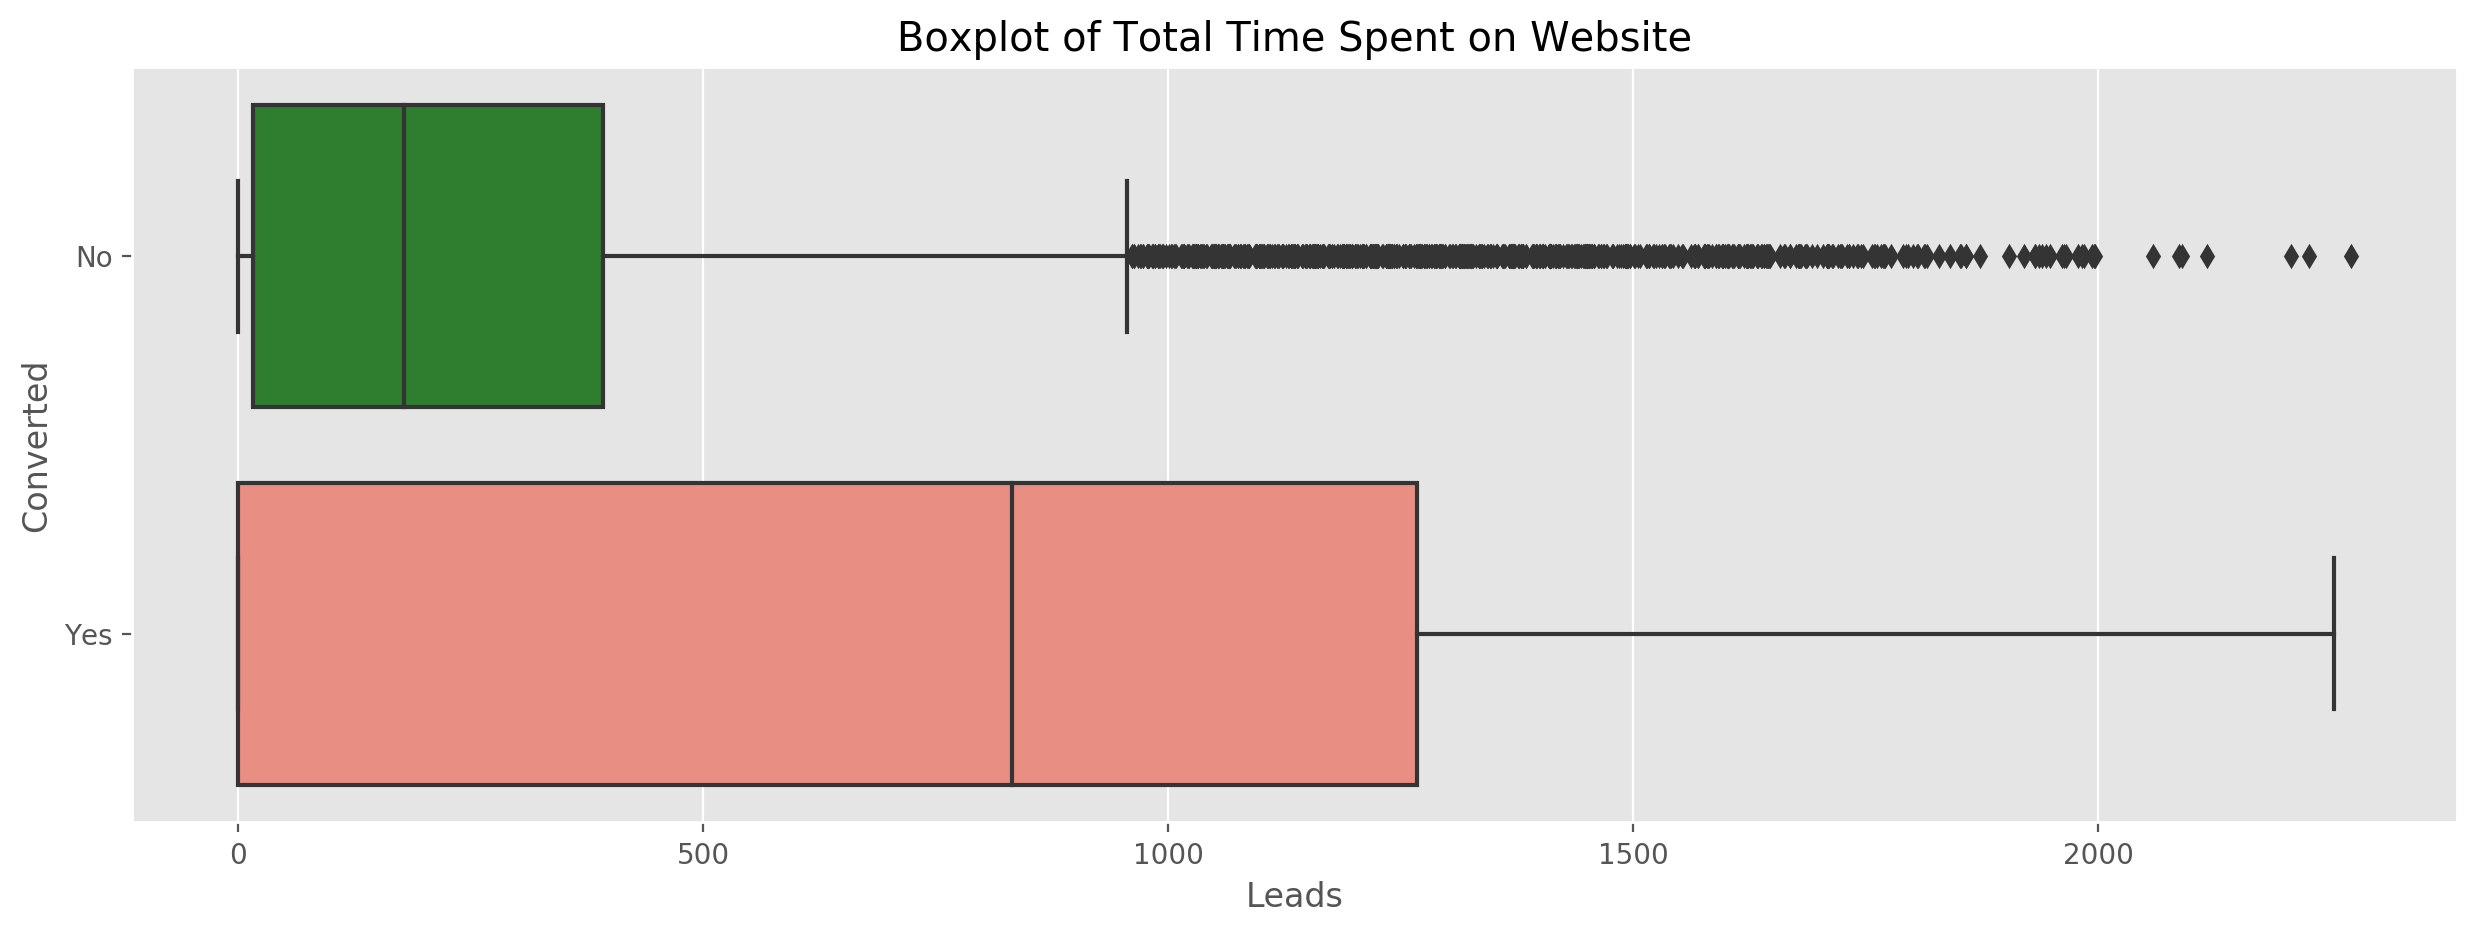

In [64]:
fig,ax = plt.subplots(figsize=(15,5),dpi=200)

sns.boxplot(x=data["Total Time Spent on Website"],y=data["Converted"].values,orient="h",
            palette=["forestgreen","salmon"])

ax.set_title("Boxplot of Total Time Spent on Website")
ax.set_xlabel("Leads")
ax.set_ylabel("Converted")
ax.set_yticklabels(["No","Yes"])

fig.show()

**2. `Lead Origin`**

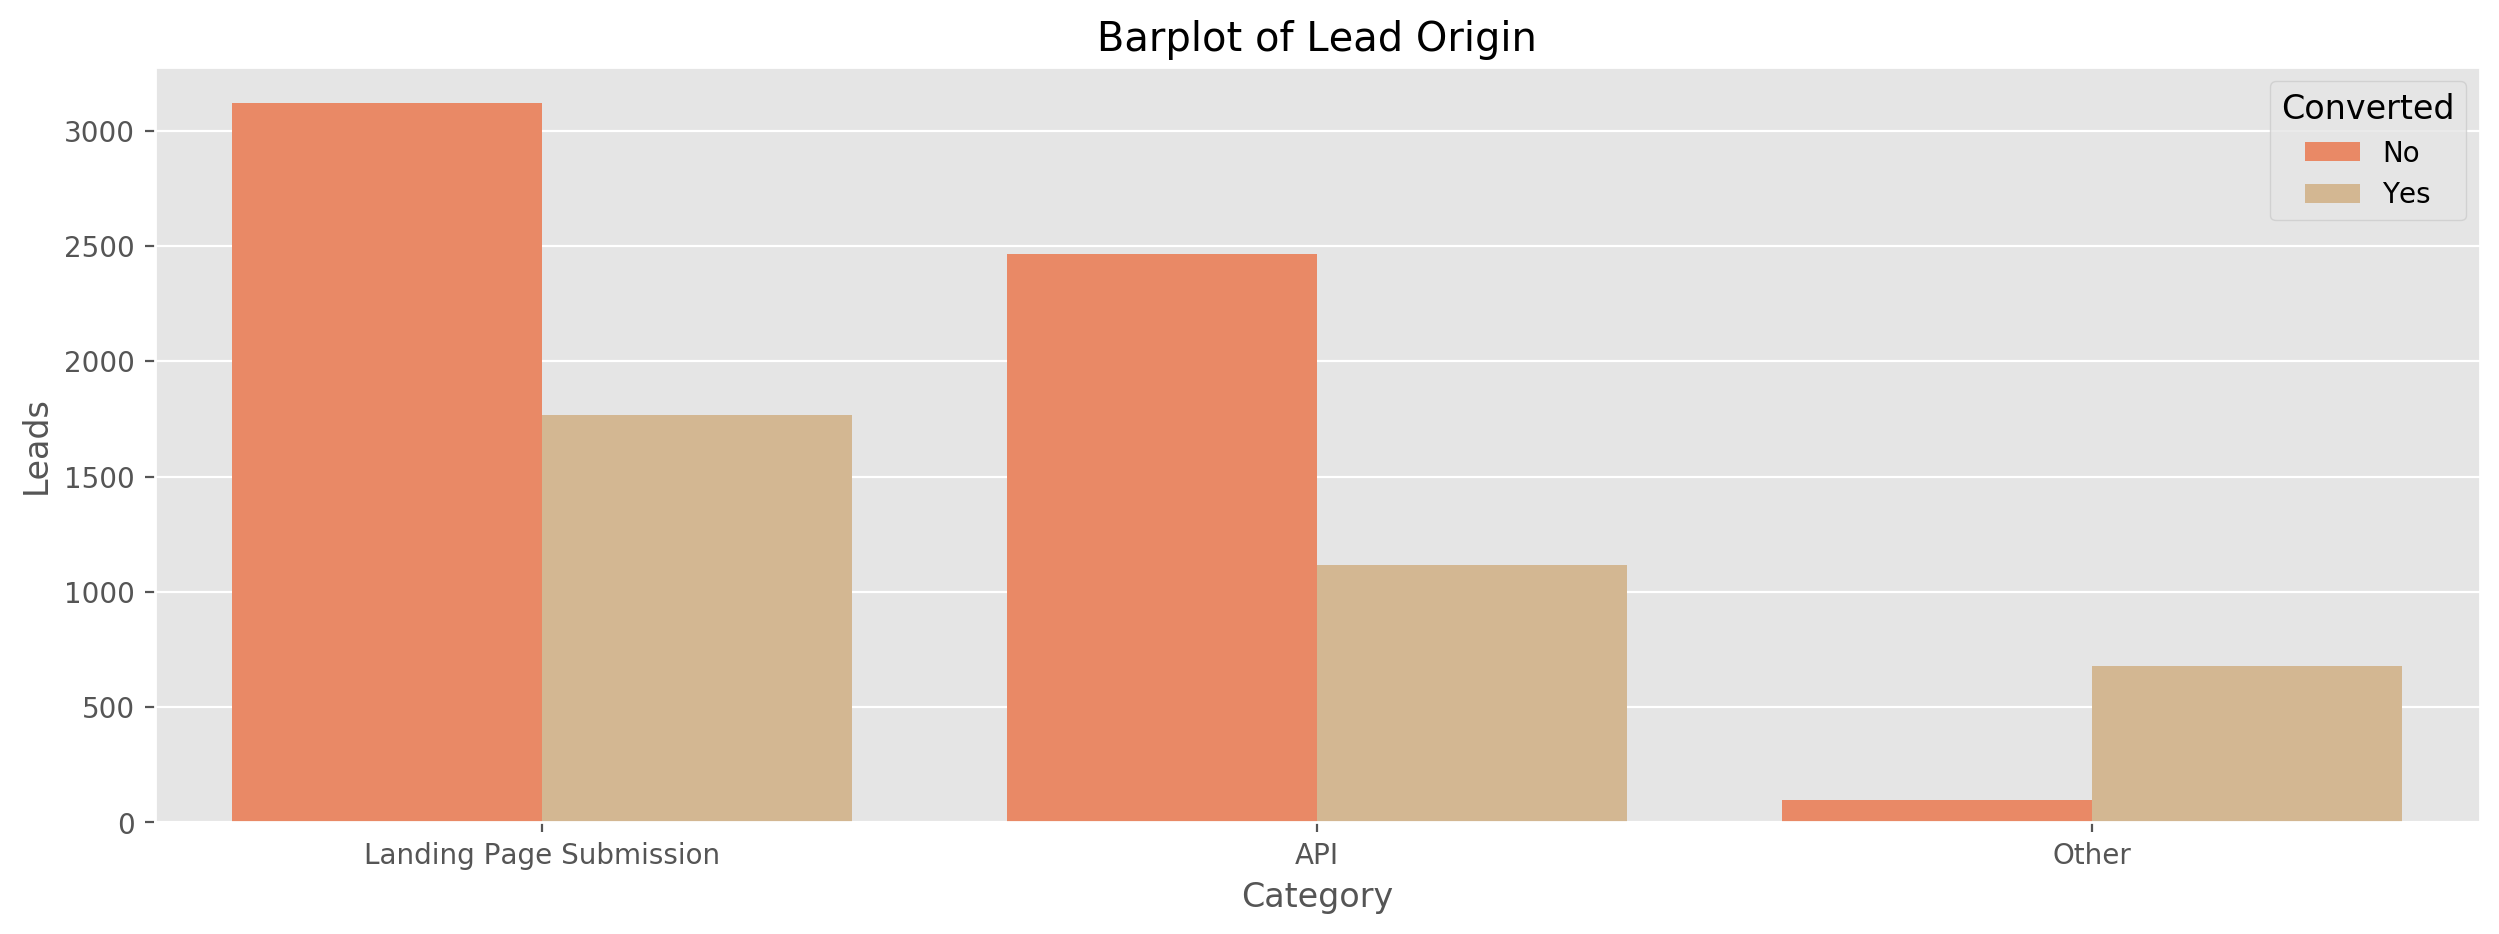

In [65]:
fig,ax = plt.subplots(figsize=(15,5),dpi=200)

col = "Lead Origin"
order = data[col].value_counts().index
hue = data["Converted"].replace({0:"No",1:"Yes"})

sns.countplot(data[col],hue=hue,order=order,palette=["coral","burlywood"])

ax.set_ylabel("Leads")
ax.set_xlabel("Category")
ax.set_title("Barplot of " + col)

fig.show()

**<span style = "color:green">Upon observing the above barplot, we can draw the following inferences:</span>**

- **<span style = "color:green">`Landing Page Submission` has the highest number of leads but most of them are not getting converted. Hence, it is benefitial to make the website's landing page more engaging so as to convert the arrived leads.</span>**

- **<span style = "color:green">Even though category `Other` has very few leads, the conversion rate is very high. Hence, increasing the number of leads through this category can be very much benefitial.</span>**

**3. `Lead Source`** 

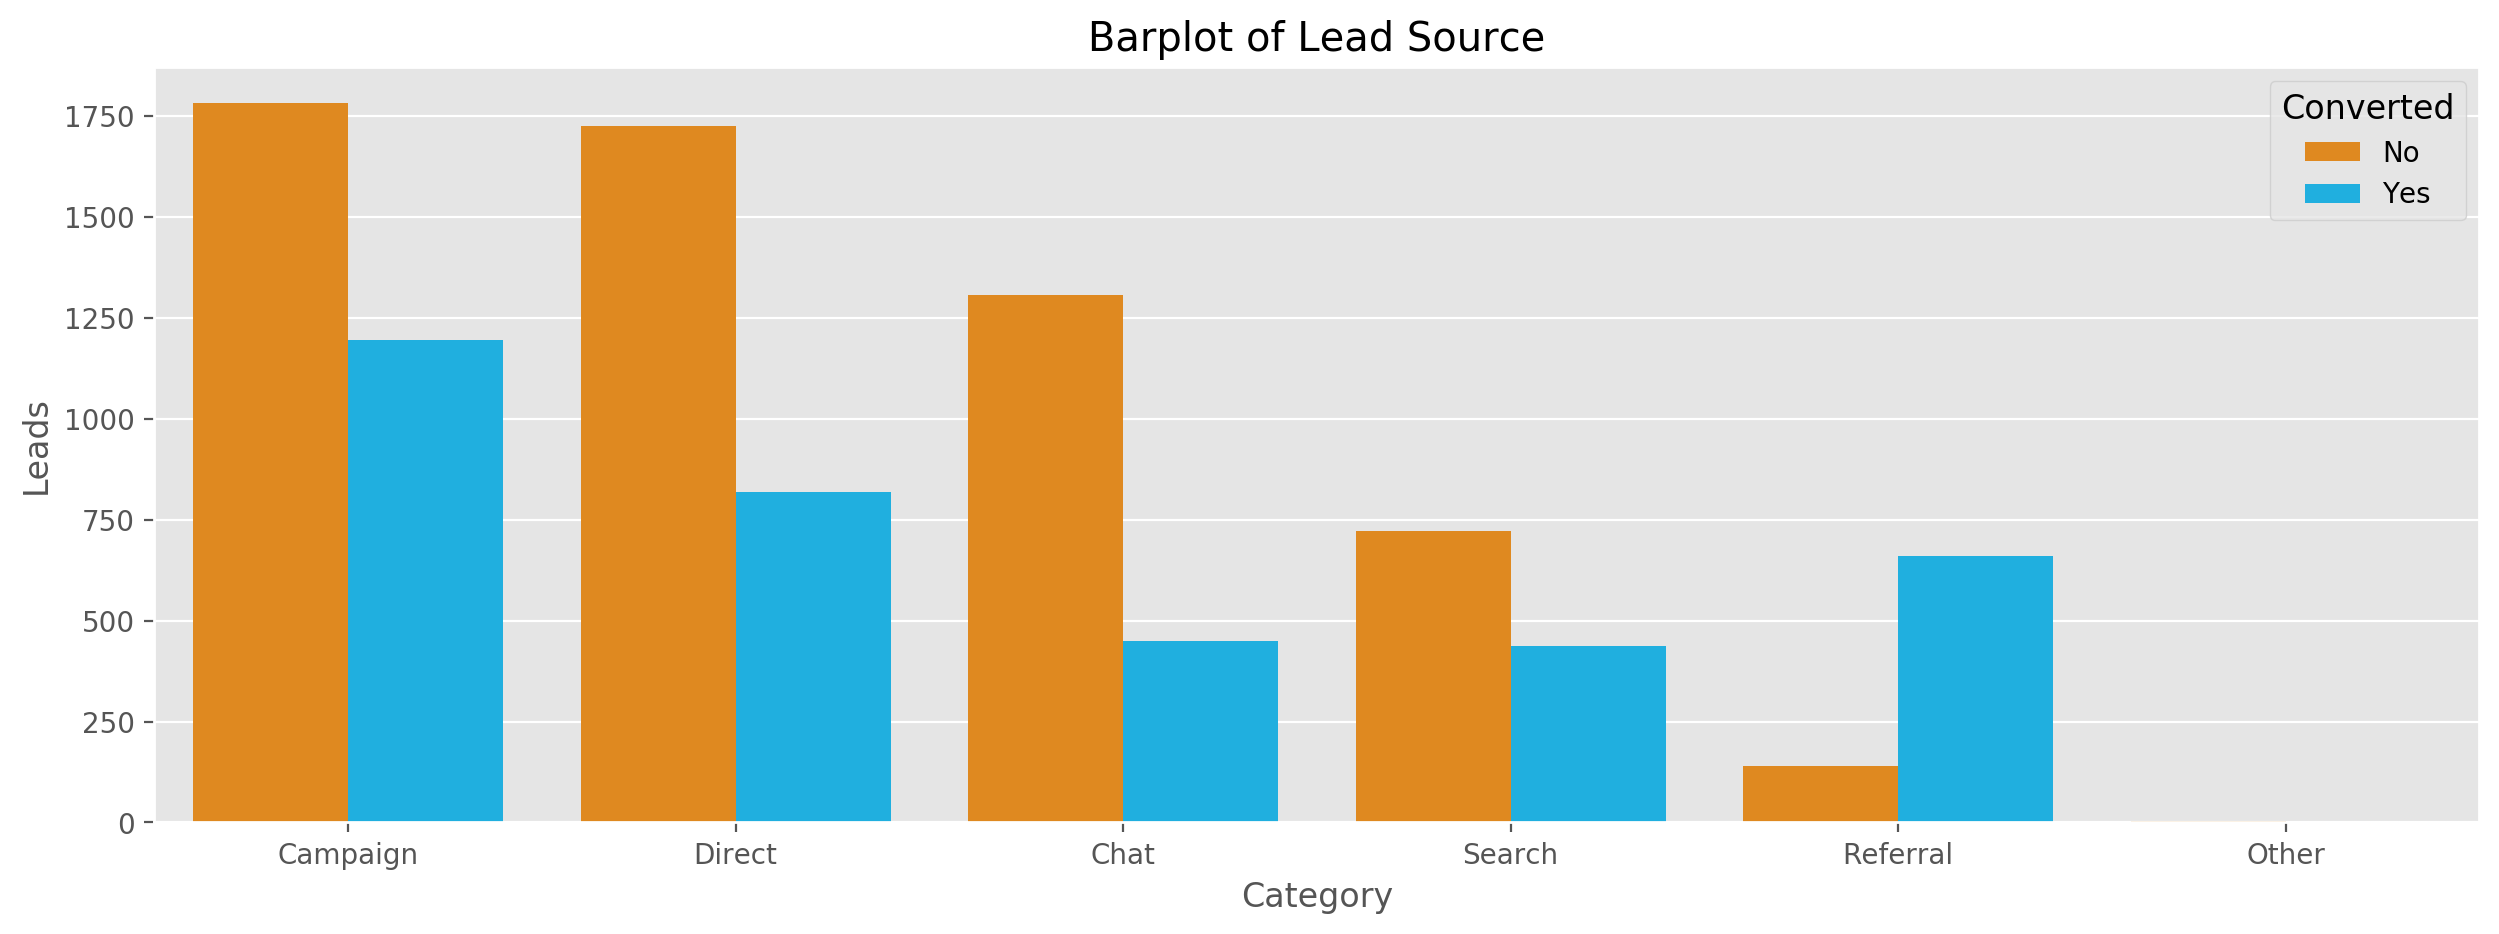

In [66]:
fig,ax = plt.subplots(figsize=(15,5),dpi=200)

col = "Lead Source"
order = data[col].value_counts().index
hue = data["Converted"].replace({0:"No",1:"Yes"})

sns.countplot(data[col],hue=hue,order=order,palette=["darkorange","deepskyblue"])

ax.set_ylabel("Leads")
ax.set_xlabel("Category")
ax.set_title("Barplot of " + col)

fig.show()

**<span style = "color:green">From the above barplot, we can draw the following inferences:</span>**

- **<span style = "color:green">`Campaign` has generated high number of leads, but the conversion rate is fairly low. Hence, it is suggested to make the campaigning on various social media channels more engaging so as to increase the lead conversion.</span>**

- **<span style = "color:green">`Chat` is showing very poor rate of lead conversion. Since, it involves one-on-one conversation with the lead, it is better to have skilled people who can compel the leads in a much efficient way so increase the lead conversion.</span>**

- **<span style = "color:green">Even though `Referral` has brought in comapritively less number of leads, the conversion rate is fairly high compared to other sources. Hence, focus should be more on bringing in more number of leads through referrals.</span>**

**4. `Current Occupation`**

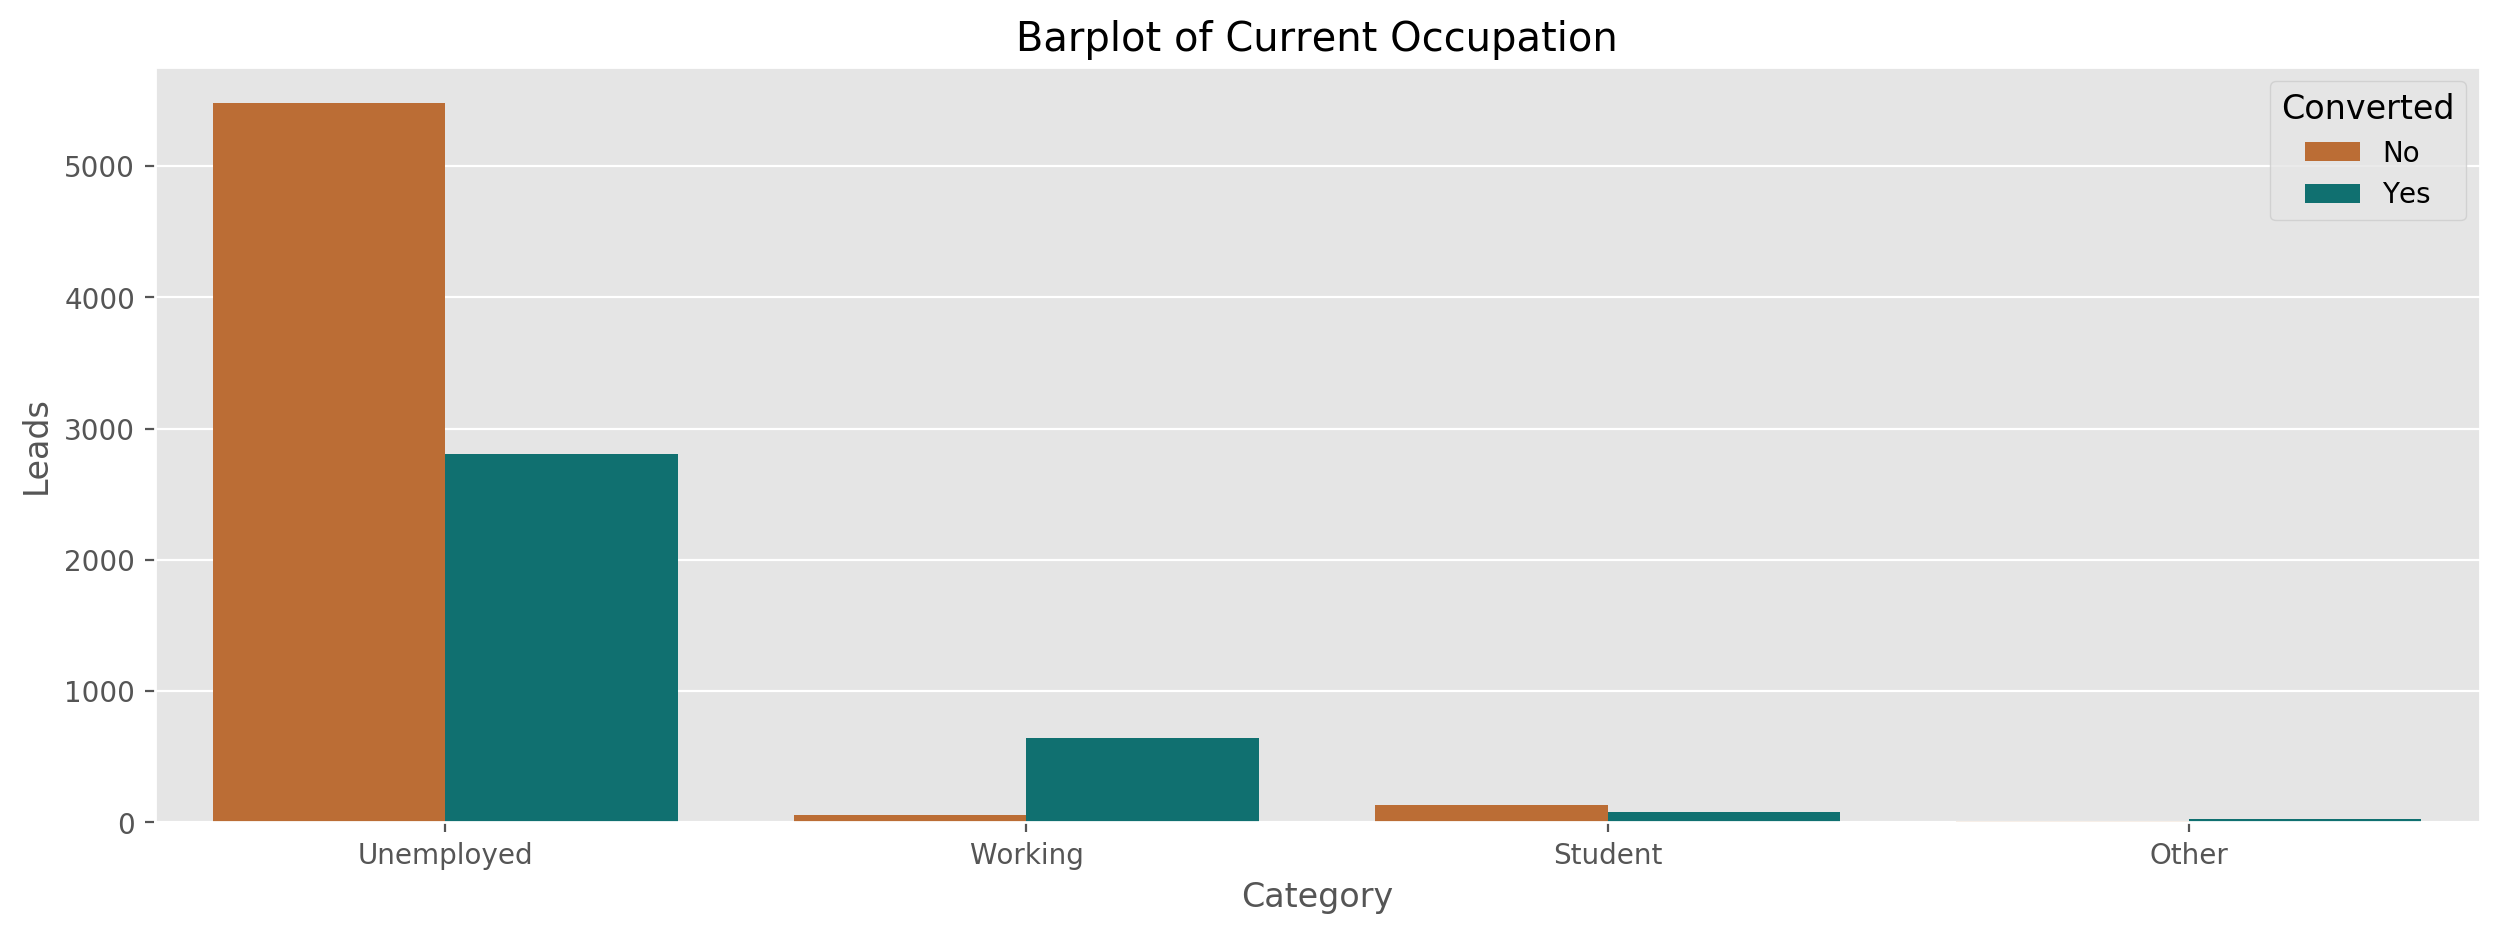

In [67]:
fig,ax = plt.subplots(figsize=(15,5),dpi=200)

col = "Current Occupation"
order = data[col].value_counts().index
hue = data["Converted"].replace({0:"No",1:"Yes"})

sns.countplot(data[col],hue=hue,order=order,palette=["chocolate","teal"])

ax.set_ylabel("Leads")
ax.set_xlabel("Category")
ax.set_title("Barplot of " + col)

fig.show()

**<span style = "color:green">From the above barplot, we can draw the following inferences:</span>**

- **<span style = "color:green">Highest amount of Leads are being generated from `Unemployed` category, yet the conversion rate is low. Hence, better strategies have to be devised so as to retain and convert the leads from these category.</span>**

- **<span style = "color:green">`Working` category has few number of leads, yet the conversion rate is very high. Hence, it is suggested to form our campaigns in such a way to attract more number of working people.</span>**

**5. `Last Activity`**

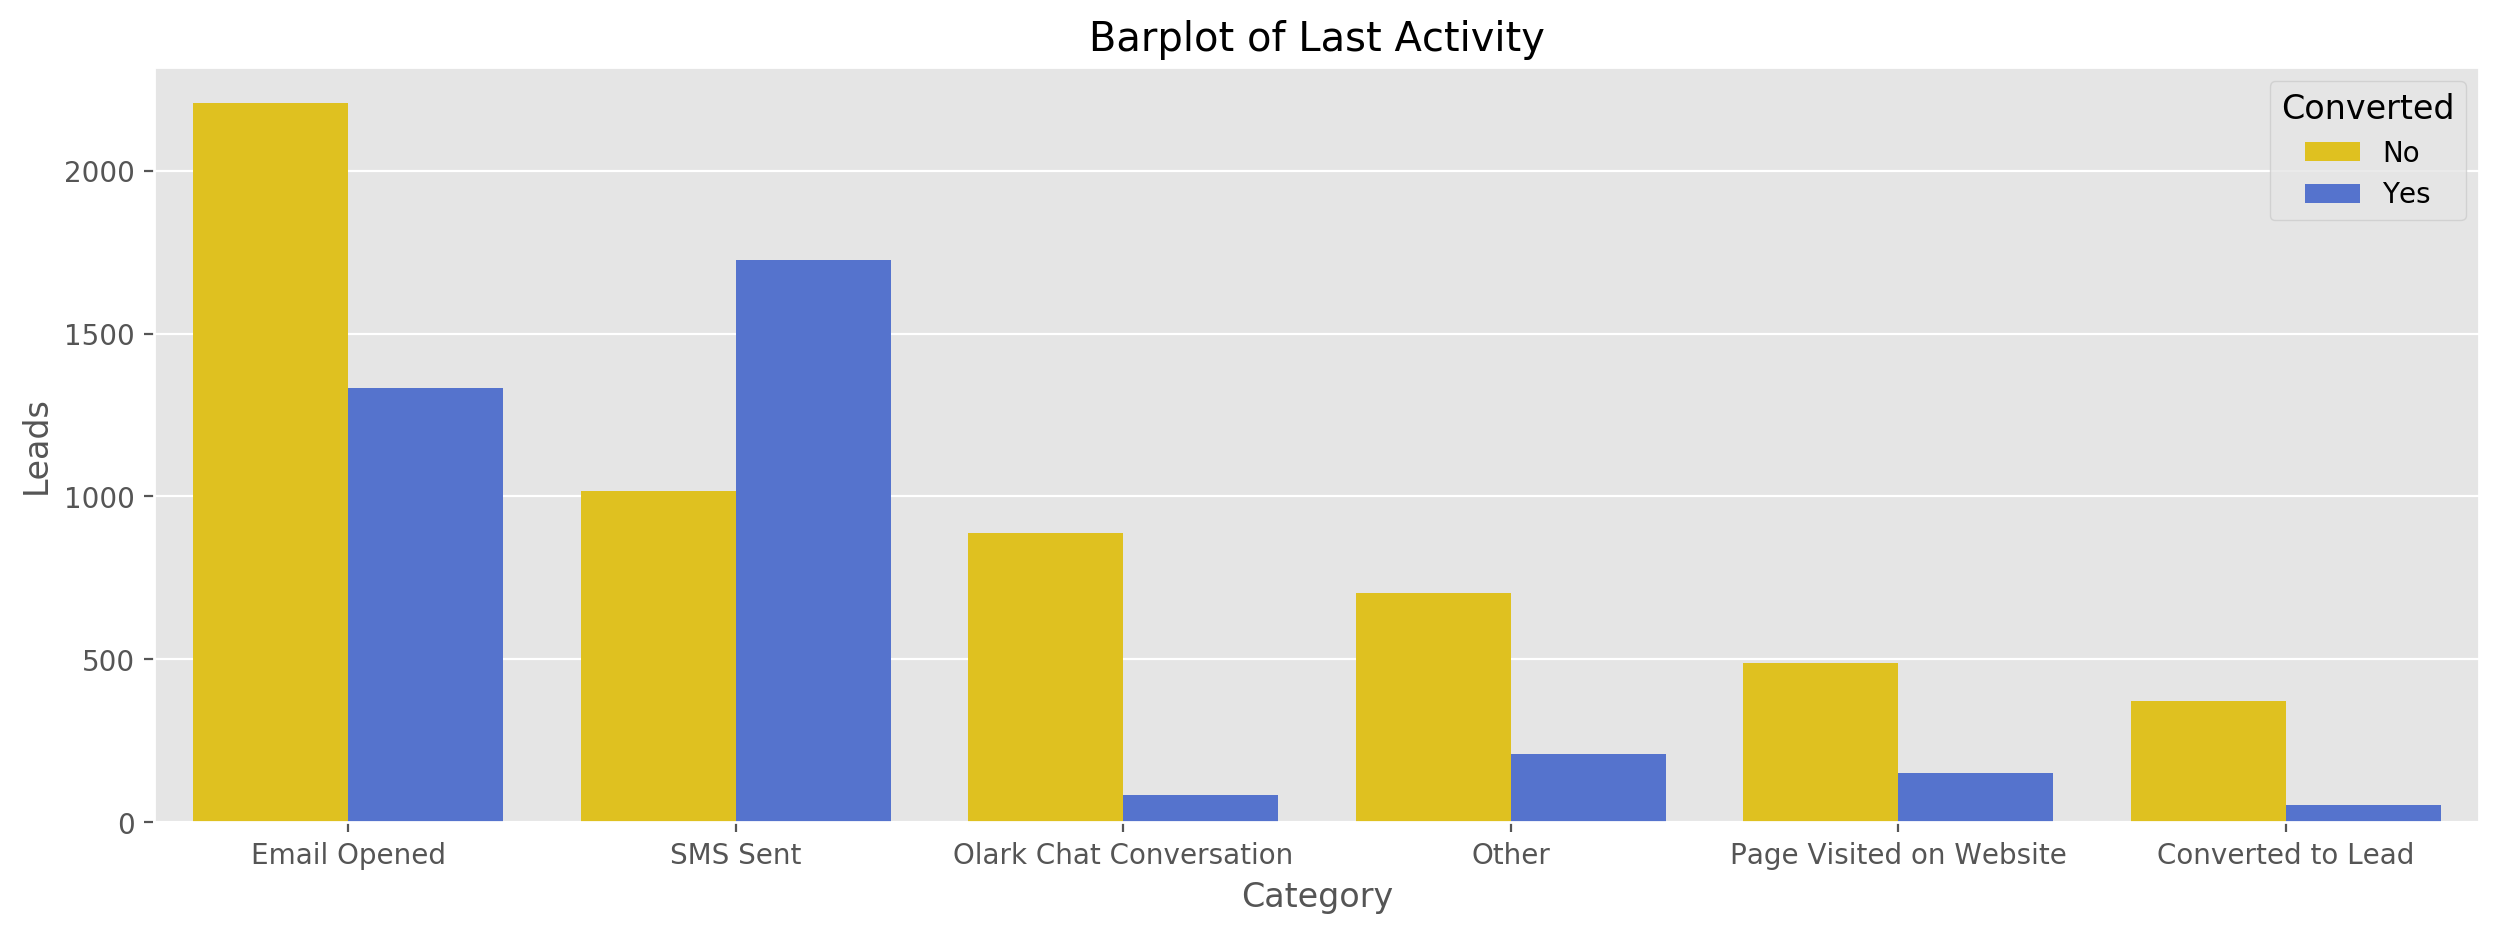

In [68]:
fig,ax = plt.subplots(figsize=(15,5),dpi=200)

col = "Last Activity"
order = data[col].value_counts().index
hue = data["Converted"].replace({0:"No",1:"Yes"})

sns.countplot(data[col],hue=hue,order=order,palette=["gold","royalblue"])

ax.set_ylabel("Leads")
ax.set_xlabel("Category")
ax.set_title("Barplot of " + col)

fig.show()

**<span style = "color:green">From the barplot, we can draw the following inferences:</span>**

- **<span style = "color:green">`Email Opened` has fairly low lead conversion, yet having the highest number of leads. Hence, it is benefitial to have even better engaging content in the Email so that more number leads get attracted towards courses offered.</span>**

- **<span style = "color:green">`SMS Sent` has very good lead conversion rate. Hence, more number of SMS campaigns have to be devised to bring in more number of leads.</span>**

**6. `Tags`**

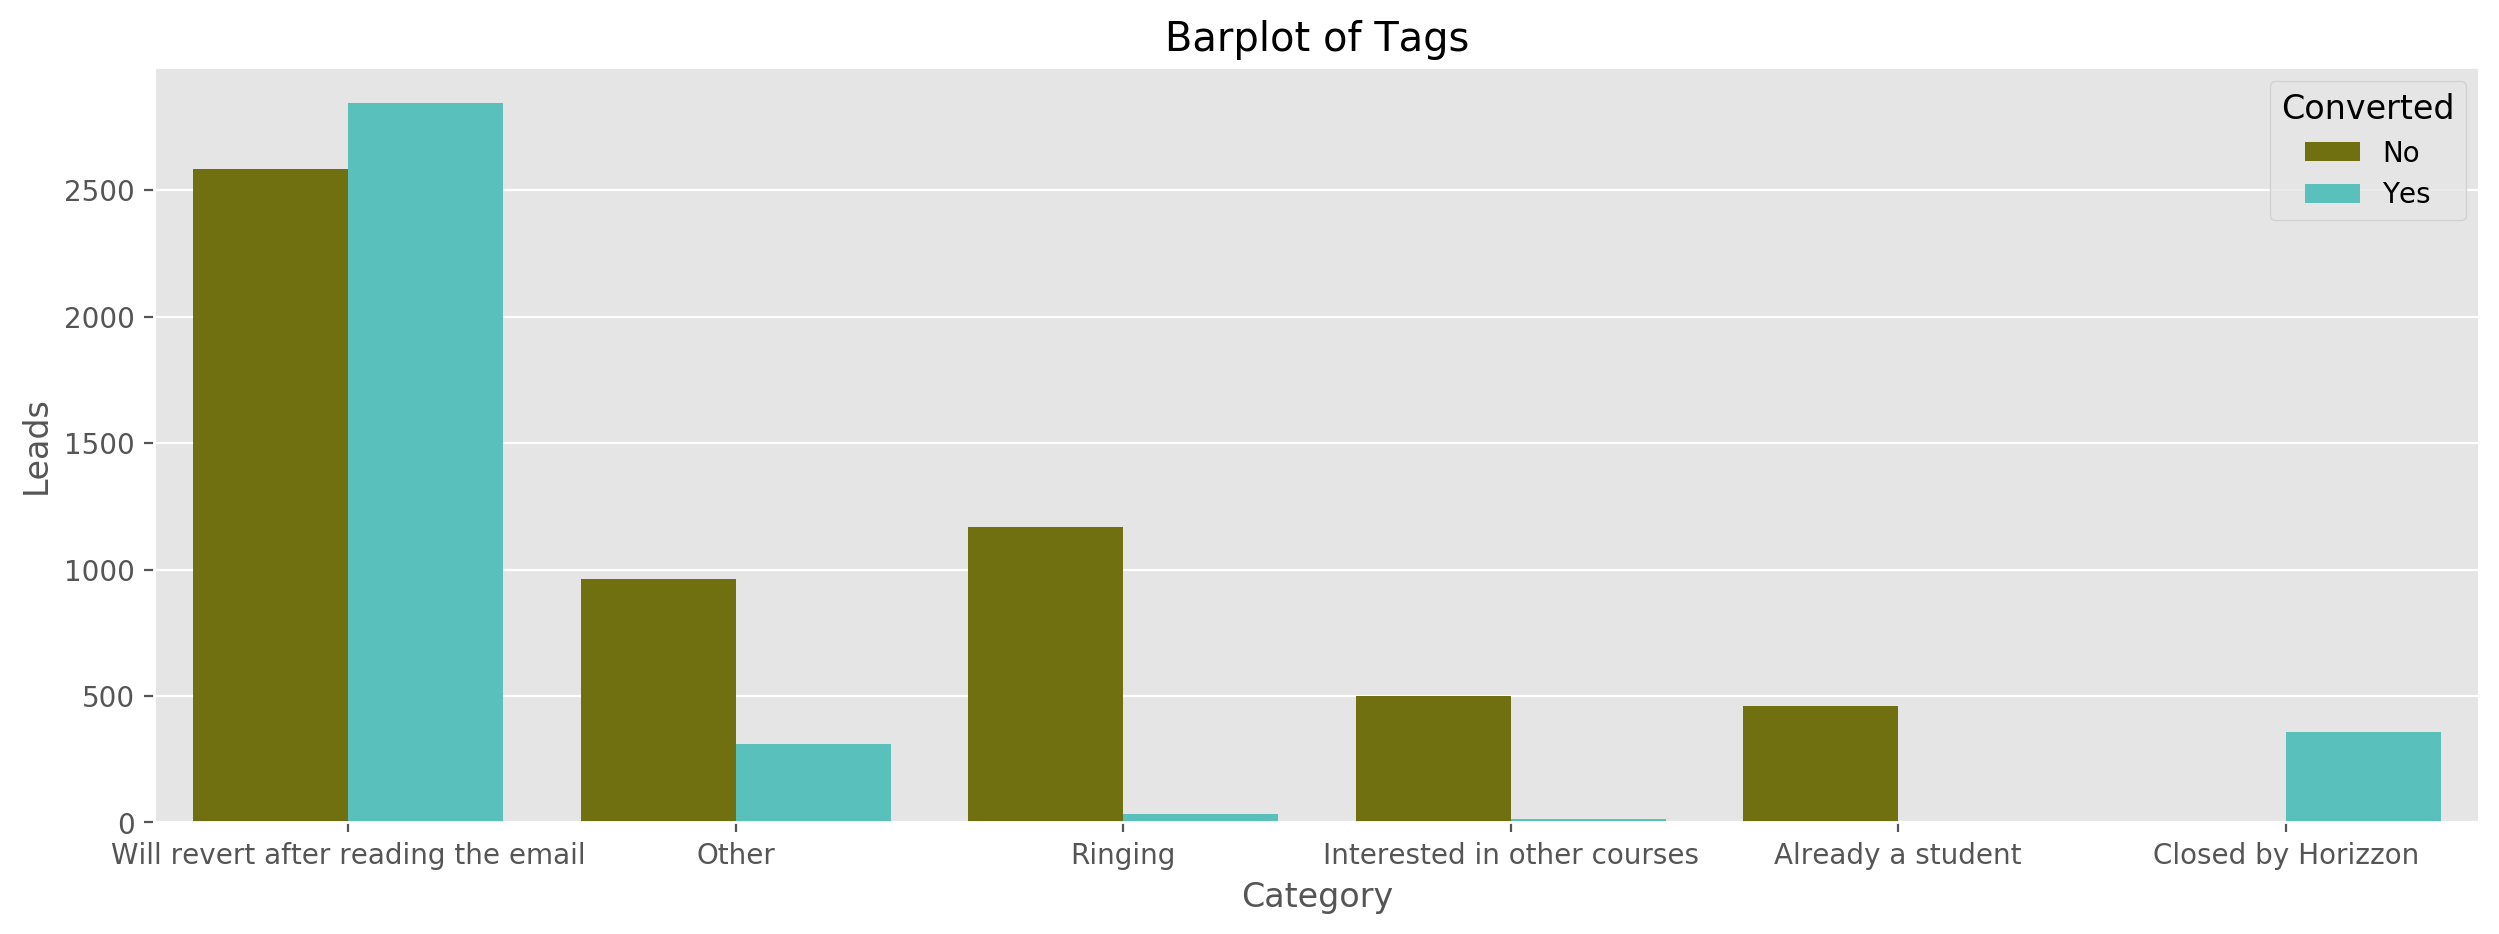

In [69]:
fig,ax = plt.subplots(figsize=(15,5),dpi=200)

col = "Tags"
order = data[col].value_counts().index
hue = data["Converted"].replace({0:"No",1:"Yes"})

sns.countplot(data[col],hue=hue,order=order,palette=["olive","mediumturquoise"])

ax.set_ylabel("Leads")
ax.set_xlabel("Category")
ax.set_title("Barplot of " + col)

fig.show()

**<span style = "color:green">From the above barplot, we can draw the following inferences:</span>**

- **<span style = "color:green">Leads having tags as `Will revert after reading the email` are having almost same amount of positive and negative conversions. Hence, more amount of follow up is required with these leads so as to have a better conversion rate.</span>**

- **<span style = "color:green">`Closed by Horizzon` has excellent lead conversion rate. It is suggested to bring in more number of leads through this category.</span>**

## Data Preprocessing

**Creating a new dataframe to keep the existing data intact**

In [70]:
data_new_features = data[["Lead Number","Converted","Total Time Spent on Website"]]

### Creating dummy variables

**Defining a function which creates the dummy variables, drops the specific column instead of the first column and joins it to the dataframe**

In [71]:
def get_dummies(col,prefix,to_drop):
    
    to_drop = prefix + " - " + to_drop
    
    dummy = pd.get_dummies(data[col],prefix=prefix,prefix_sep=" - ").drop(to_drop,axis=1)
    
    df_concat = pd.concat([data_new_features,dummy],axis=1)
    
    return df_concat

**Creating a list of column names along with the prefix to be added for each column and the variable to be dropped**

In [72]:
dummy_cols = [("Lead Origin","Origin","Other"),("Lead Source","Source","Other"),
 ("Current Occupation","Occupation","Other"),("City Category","City","Tier II"),
 ("Specialization","Specialization","Other"),("Last Activity","Last Activity","Other"),
 ("Tags","Tag","Other")]

**Running the function on the above list**

In [73]:
for col, prefix, to_drop in dummy_cols:
    data_new_features = get_dummies(col,prefix,to_drop)

In [74]:
data_new_features.head()

,Lead Number,Converted,Total Time Spent on Website,Origin - API,Origin - Landing Page Submission,Source - Campaign,Source - Chat,Source - Direct,Source - Referral,Source - Search,Occupation - Student,Occupation - Unemployed,Occupation - Working,City - Tier I,City - Tier III,Specialization - Finance,Last Activity - Converted to Lead,Last Activity - Email Opened,Last Activity - Olark Chat Conversation,Last Activity - Page Visited on Website,Last Activity - SMS Sent,Tag - Already a student,Tag - Closed by Horizzon,Tag - Interested in other courses,Tag - Ringing,Tag - Will revert after reading the email
0,660737,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
1,660728,0,674,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0
2,660727,1,1532,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,660719,0,305,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,1,1428,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1


### Creating binary variables

**Defining a function to create binary variables**

In [75]:
def binary_vals(col):
    
    binary_col = data[col].replace({"Yes":1,"No":0})
    
    df_concat = pd.concat([data_new_features,binary_col],axis=1)
    
    return df_concat

**Creating a list of binary columns**

In [76]:
binary_cols = ["Maharashtra","Last Activity Modified","Free Ebook"]

**Running the function on the above list**

In [77]:
for col in binary_cols:
    data_new_features = binary_vals(col)

In [78]:
data_new_features.head()

,Lead Number,Converted,Total Time Spent on Website,Origin - API,Origin - Landing Page Submission,Source - Campaign,Source - Chat,Source - Direct,Source - Referral,Source - Search,Occupation - Student,Occupation - Unemployed,Occupation - Working,City - Tier I,City - Tier III,Specialization - Finance,Last Activity - Converted to Lead,Last Activity - Email Opened,Last Activity - Olark Chat Conversation,Last Activity - Page Visited on Website,Last Activity - SMS Sent,Tag - Already a student,Tag - Closed by Horizzon,Tag - Interested in other courses,Tag - Ringing,Tag - Will revert after reading the email,Maharashtra,Last Activity Modified,Free Ebook
0,660737,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0
1,660728,0,674,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
2,660727,1,1532,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1
3,660719,0,305,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,660681,1,1428,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0


### Creating correlation heatmap

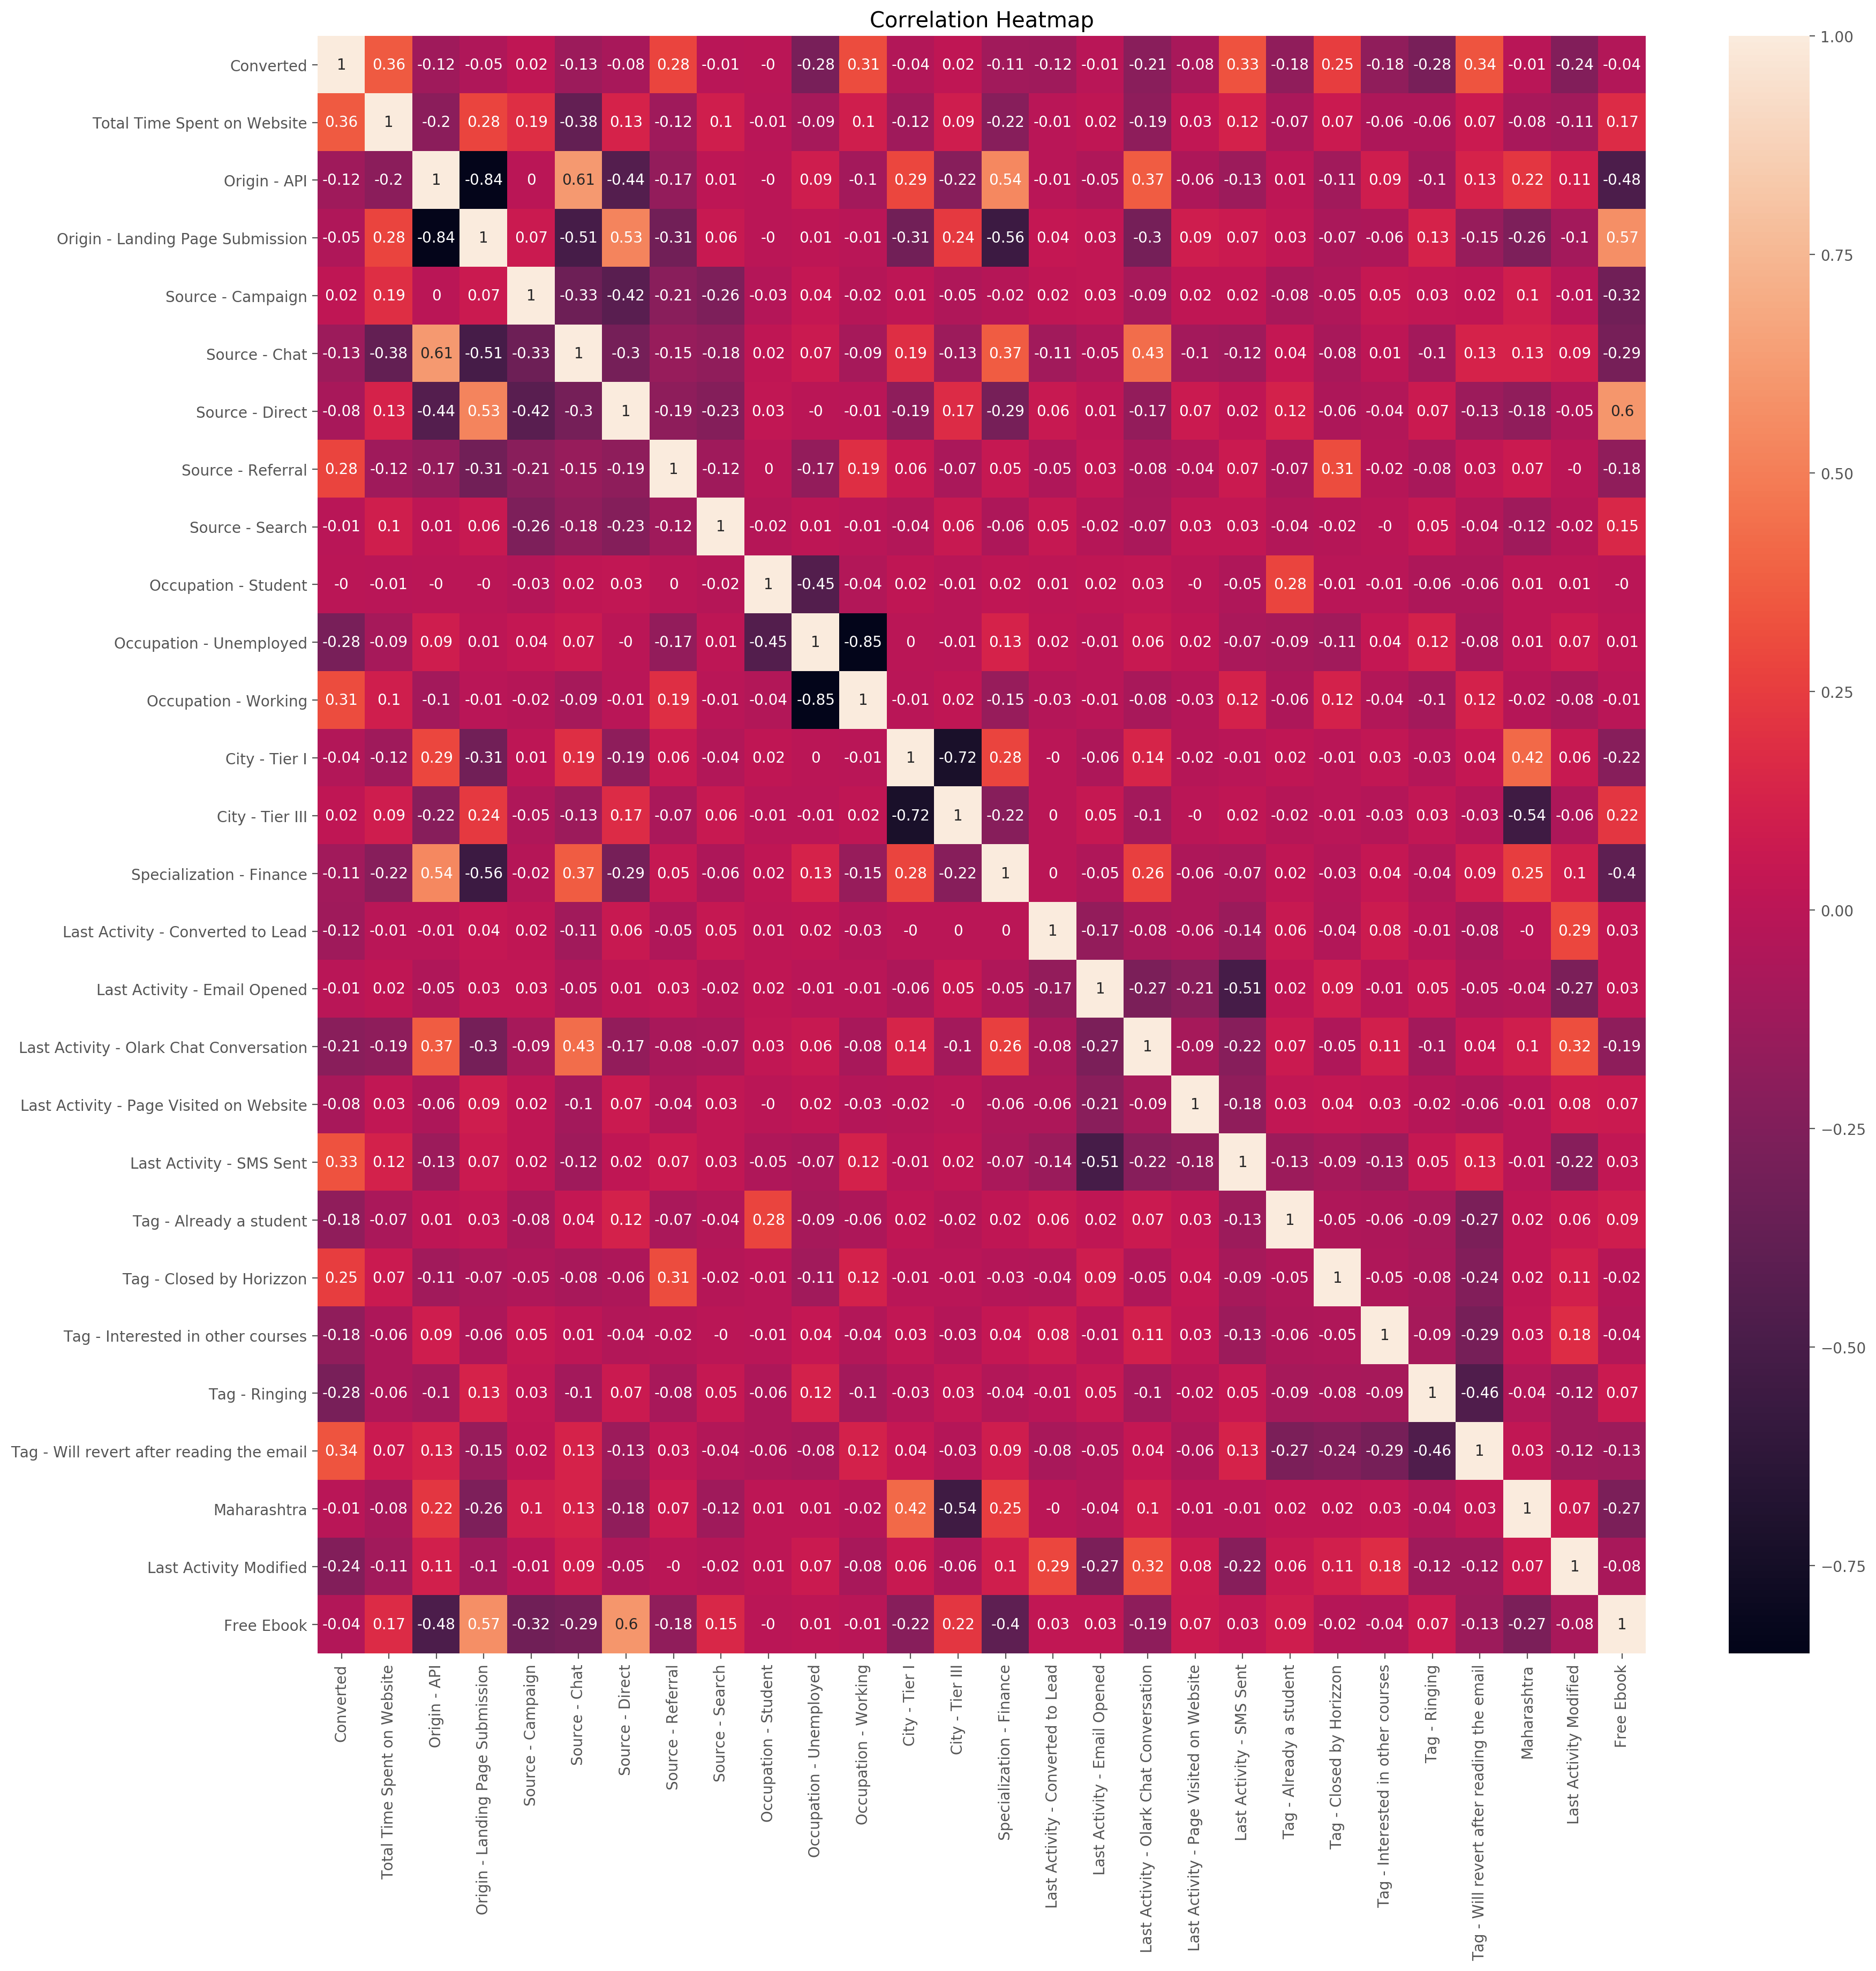

In [79]:
fig,ax = plt.subplots(figsize=(20,20),dpi=200)

sns.heatmap(data_new_features.drop("Lead Number",axis=1).corr().round(2),annot=True)

ax.set_title("Correlation Heatmap")

fig.show()

**<span style = "color:green">Upon observing the above heatmap, we can find that the following variables having considerate amount of correlation with the target variable `Converted`:</span>**

- **<span style = "color:green">`Total Time Spent on Website` = 0.36</span>**
- **<span style = "color:green">`Tag - Will revert after reading the email` = 0.34</span>**
- **<span style = "color:green">`Last Activity - SMS Sent` = 0.33</span>**
- **<span style = "color:green">`Occupation - Working` = 0.31</span>**
- **<span style = "color:green">`Source - Referral` = 0.28</span>**
- **<span style = "color:green">`Tag - Closed by Horizzon` = 0.25</span>**
- **<span style = "color:green">`Last Activity - Olark Chat Conversation` = -0.21</span>**
- **<span style = "color:green">`Last Activity Modified` = -0.24</span>**
- **<span style = "color:green">`Occupation - Unemployed` = -0.28</span>**
- **<span style = "color:green">`Tag - Ringing` = -0.28</span>**

### Splitting the datset into `Train` and `Test`

**Creating `X` and `y`**

In [80]:
X = data_new_features.drop(["Lead Number","Converted"],axis=1)

y = data_new_features["Converted"]

In [81]:
X.head()

,Total Time Spent on Website,Origin - API,Origin - Landing Page Submission,Source - Campaign,Source - Chat,Source - Direct,Source - Referral,Source - Search,Occupation - Student,Occupation - Unemployed,Occupation - Working,City - Tier I,City - Tier III,Specialization - Finance,Last Activity - Converted to Lead,Last Activity - Email Opened,Last Activity - Olark Chat Conversation,Last Activity - Page Visited on Website,Last Activity - SMS Sent,Tag - Already a student,Tag - Closed by Horizzon,Tag - Interested in other courses,Tag - Ringing,Tag - Will revert after reading the email,Maharashtra,Last Activity Modified,Free Ebook
0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0
1,674,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
2,1532,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1
3,305,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,1428,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0


In [82]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

**Splitting the Data**

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [84]:
print(f"Columns in Train Data: {X_train.shape[0]}")
print(f"Columns in Test Data: {X_test.shape[0]}")

Columns in Train Data: 6468
Columns in Test Data: 2772


### Scaling `X_Train`

In [85]:
scaler = StandardScaler()

X_train["Total Time Spent on Website"] = scaler.fit_transform(X_train[["Total Time Spent on Website"]])

In [86]:
X_train.head()

,Total Time Spent on Website,Origin - API,Origin - Landing Page Submission,Source - Campaign,Source - Chat,Source - Direct,Source - Referral,Source - Search,Occupation - Student,Occupation - Unemployed,Occupation - Working,City - Tier I,City - Tier III,Specialization - Finance,Last Activity - Converted to Lead,Last Activity - Email Opened,Last Activity - Olark Chat Conversation,Last Activity - Page Visited on Website,Last Activity - SMS Sent,Tag - Already a student,Tag - Closed by Horizzon,Tag - Interested in other courses,Tag - Ringing,Tag - Will revert after reading the email,Maharashtra,Last Activity Modified,Free Ebook
1871,-0.885371,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
6795,0.005716,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3516,-0.691418,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
8105,1.365219,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3934,-0.885371,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0


## Model Building

**<span style = "color:green">For the purpose of efficiency, a custom function is being defined for building the model so that it could be reused for every iteration and also to include the Variance Inflation Factor for each variable along with the summary of the model.</span>**

**Buliding the function**

In [87]:
def log_reg(X_train,y_train):
    
    #Adding Constant
    global X_train_sm
    X_train_sm = sm.add_constant(X_train)
    
    #Instantiating the model
    model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    
    #Fitting the model
    global model_fit
    model_fit = model.fit()
    
    #Computing VIF
    vif = [np.nan]
    for i in range(X_train.shape[1]):
        vif_val = variance_inflation_factor(X_train.values,i)
        vif.append(round(vif_val,2))
    
    #Creating a DataFrame of Summary Statistics along with VIF
    summary = pd.DataFrame(index=X_train_sm.columns,data={"coef":model_fit.params.round(4),
    "Std Err":model_fit.bse.round(3),"z":model_fit.tvalues.round(3),"P>|z|":model_fit.pvalues.round(3),
    "[0.025":model_fit.conf_int()[0].round(3),"0.975]":model_fit.conf_int()[1].round(3),"VIF":vif})
    
    return summary

**Running the model with all the variables**

In [88]:
summary1 = log_reg(X_train,y_train)
summary1

,coef,Std Err,z,P>|z|,[0.025,0.975],VIF
const,2.3347,1.697,1.376,0.169,-0.991,5.660,NaN
Total Time Spent on Website,1.1222,0.048,23.542,0.000,1.029,1.216,1.32
Origin - API,-2.2471,0.271,-8.277,0.000,-2.779,-1.715,19.03
Origin - Landing Page Submission,-2.5706,0.281,-9.144,0.000,-3.122,-2.020,27.29
Source - Campaign,-0.1201,1.492,-0.081,0.936,-3.044,2.803,104.19
Source - Chat,0.5951,1.498,0.397,0.691,-2.342,3.532,62.49
Source - Direct,-0.2513,1.492,-0.168,0.866,-3.175,2.672,87.32
Source - Referral,0.5877,1.511,0.389,0.697,-2.374,3.549,26.02
Source - Search,-0.2097,1.494,-0.140,0.888,-3.139,2.719,39.05
Occupation - Student,-0.0344,0.790,-0.044,0.965,-1.583,1.515,6.40


**Running RFE with Features to Select = 15**

In [89]:
logreg = LogisticRegression()

rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

rfe_result = pd.DataFrame(data={"Support":rfe.support_,"Ranking":rfe.ranking_},index=X_train.columns)
rfe_result.sort_values("Ranking",ascending=True,inplace=True)

rfe_result

,Support,Ranking
Total Time Spent on Website,True,1
Origin - API,True,1
Origin - Landing Page Submission,True,1
Tag - Will revert after reading the email,True,1
Source - Chat,True,1
Tag - Ringing,True,1
Source - Referral,True,1
Tag - Interested in other courses,True,1
Tag - Closed by Horizzon,True,1
Occupation - Unemployed,True,1


**<span style = "color:green">We can observe from the above result that the following variables `Last Activity - Email Opened`, `Specialization - Finance`, `Last Activity - Page Visited on Website`, `Source - Direct`,`Source - Search`, `Source - Campaign`, `Last Activity - Converted to Lead`, `City - Tier I`, `City - Tier III`, `Occupation - Student`, `Maharashtra` and `Free Ebook` are unnecessary and can be dropped.</span>**

**Dropping the unnecessary variables**

In [90]:
cols_to_drop = rfe_result[rfe_result["Support"]==False].index

X_train.drop(cols_to_drop,axis=1,inplace=True)

**Running the model with the balance 15 variables**

In [91]:
summary2 = log_reg(X_train,y_train)
summary2

,coef,Std Err,z,P>|z|,[0.025,0.975],VIF
const,1.9716,0.416,4.737,0.000,1.156,2.787,NaN
Total Time Spent on Website,1.1342,0.047,24.009,0.000,1.042,1.227,1.30
Origin - API,-2.3730,0.270,-8.781,0.000,-2.903,-1.843,10.92
Origin - Landing Page Submission,-2.5508,0.272,-9.394,0.000,-3.083,-2.019,13.79
Source - Chat,0.7601,0.135,5.636,0.000,0.496,1.024,2.43
Source - Referral,0.7308,0.249,2.940,0.003,0.244,1.218,2.66
Occupation - Unemployed,-1.2481,0.311,-4.018,0.000,-1.857,-0.639,23.61
Occupation - Working,1.4737,0.382,3.863,0.000,0.726,2.221,3.03
Last Activity - Olark Chat Conversation,-0.8121,0.182,-4.456,0.000,-1.169,-0.455,1.57
Last Activity - SMS Sent,1.5702,0.088,17.910,0.000,1.398,1.742,1.63


**<span style = "color:green">We can observe from the above result that `Occupation - Unemployed` has a high VIF of `23.61`. Hence, this variable can be dropped.</span>**

**Dropping `Occupation - Unemployed`**

In [92]:
X_train.drop("Occupation - Unemployed",axis=1,inplace=True)

**Running the model again with the balance 14 variables**

In [93]:
summary3 = log_reg(X_train,y_train)
summary3

,coef,Std Err,z,P>|z|,[0.025,0.975],VIF
const,0.7736,0.287,2.699,0.007,0.212,1.335,NaN
Total Time Spent on Website,1.1382,0.047,24.124,0.000,1.046,1.231,1.29
Origin - API,-2.4122,0.270,-8.934,0.000,-2.941,-1.883,4.44
Origin - Landing Page Submission,-2.5686,0.271,-9.466,0.000,-3.100,-2.037,4.16
Source - Chat,0.7666,0.135,5.693,0.000,0.503,1.030,2.43
Source - Referral,0.7361,0.248,2.964,0.003,0.249,1.223,1.74
Occupation - Working,2.6905,0.233,11.571,0.000,2.235,3.146,1.19
Last Activity - Olark Chat Conversation,-0.8176,0.182,-4.495,0.000,-1.174,-0.461,1.57
Last Activity - SMS Sent,1.5547,0.087,17.802,0.000,1.383,1.726,1.60
Tag - Already a student,-3.5386,0.730,-4.849,0.000,-4.969,-2.108,1.34


**<span style = "color:green">From the above results we can understand that the `p-values` for all the variables are within `0.05` and the `VIF` for each of the variables are also within `5`. Hence, this model is a good fit to proceed further.</span>**

## Model Evaluation

### Getting probabilities on `X_Train`

In [94]:
y_train_pred = model_fit.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred = pd.DataFrame({"Lead Index":y_train.index,"Actual":y_train.values,
                             "Convert Probability":y_train_pred})

y_train_pred.head()

,Lead Index,Actual,Convert Probability
0,1871,0,0.006155
1,6795,0,0.356487
2,3516,0,0.007663
3,8105,0,0.131114
4,3934,0,0.118781


### Deriving the confusion matrix and other summary metrics

**<span style = "color:green">Since all the summary metrics need to be computed on both train and test data and for various cut-offs. A function has been defined computing all the required summary metrics.</span>**

**<span style = "color:green">Inputs required are cut-off probability and dataframe containing the train or test probabilities (y_train_pred or y_test_pred).</span>**

**Defining the funtion**

In [95]:
def summary_metrics(df_pred,pred_prob):
    
    #Creating Predict Column at given probability
    pred_col = "Predict @ " + str(pred_prob)
    df_pred[pred_col] = df_pred["Convert Probability"].map(lambda x: 1 if x > pred_prob else 0)
    
    #Ceating Confusion Matrix
    confusion = metrics.confusion_matrix(df_pred["Actual"],df_pred[pred_col])
    
    confusion_matrix = pd.DataFrame(index=["Not Converted","Converted"],data={"Not Converted":confusion[:,0],
                                                                              "Converted":confusion[:,1]})
    confusion_matrix.columns = pd.MultiIndex.from_product([["Predicted"],["Not Converted","Converted"]])
    confusion_matrix.set_index(pd.MultiIndex.from_product([["Actual"],["Not Converted","Converted"]]),
                               inplace=True)  
    
    TP = confusion[1,1] # True Positives
    TN = confusion[0,0] # True Negatives
    FP = confusion[0,1] # False Positives
    FN = confusion[1,0] # False Negatives
    
    #Computing Accuracy
    accuracy = metrics.accuracy_score(df_pred["Actual"],df_pred[pred_col])
    accuracy = round(accuracy,4)
    
    #Computing Sensitivity
    sensitivity = round(TP/float(TP+FN),4)
    
    #Computing Specificity
    specificity = round(TN/float(TN+FP),4)
    
    #Computing False Positive Rate
    false_positive = round(FP/float(TN+FP),4)
    
    #Computing False Negative Rate
    false_negative = round(FN/float(TP+FN),4)
    
    #Computing Positive Predictive Value
    positive_pred_value = round(TP/float(TP+FP),4)
    
    #Computing Negative Predictive Value
    negative_pred_value = round(TN/float(TN+FN),4)
    
    key_metrics = {"Accuracy":accuracy,
                   "Sensitivity (TP/(TP + FN))":sensitivity,
                   "Specificity (TN/(TN + FP))":specificity}
    
    other_metrics = {"False Positive Rate (FP/(TN + FP))":false_positive,
                     "False Negative Rate (FN/(TP + FN))":false_negative,
                     "Positive Predictive Value (TP/(TP + FP))":positive_pred_value,
                     "Negative Predictive Value (TN/(TN + FN))":negative_pred_value}
    
    return confusion_matrix, key_metrics, other_metrics

**Running the function on `y_train_pred` with the cut-off probability as `0.5`**

In [96]:
confusion_matrix1, key_metrics1, other_metrics1 = summary_metrics(y_train_pred,0.5)

In [97]:
y_train_pred.head()

,Lead Index,Actual,Convert Probability,Predict @ 0.5
0,1871,0,0.006155,0
1,6795,0,0.356487,0
2,3516,0,0.007663,0
3,8105,0,0.131114,0
4,3934,0,0.118781,0


**Inspecting the confusion matrix**

In [98]:
confusion_matrix1

Predicted          
                     Not Converted Converted
Actual Not Converted          3699       303
       Converted               496      1970

**Inspecting other metrics**

In [99]:
for metric in key_metrics1:
    print(f"{metric}: {key_metrics1[metric]}",end="\n\n")
for metric in other_metrics1:
    print(f"{metric}: {other_metrics1[metric]}",end="\n\n")

Accuracy: 0.8765

Sensitivity (TP/(TP + FN)): 0.7989

Specificity (TN/(TN + FP)): 0.9243

False Positive Rate (FP/(TN + FP)): 0.0757

False Negative Rate (FN/(TP + FN)): 0.2011

Positive Predictive Value (TP/(TP + FP)): 0.8667

Negative Predictive Value (TN/(TN + FN)): 0.8818



### Buliding the ROC curve

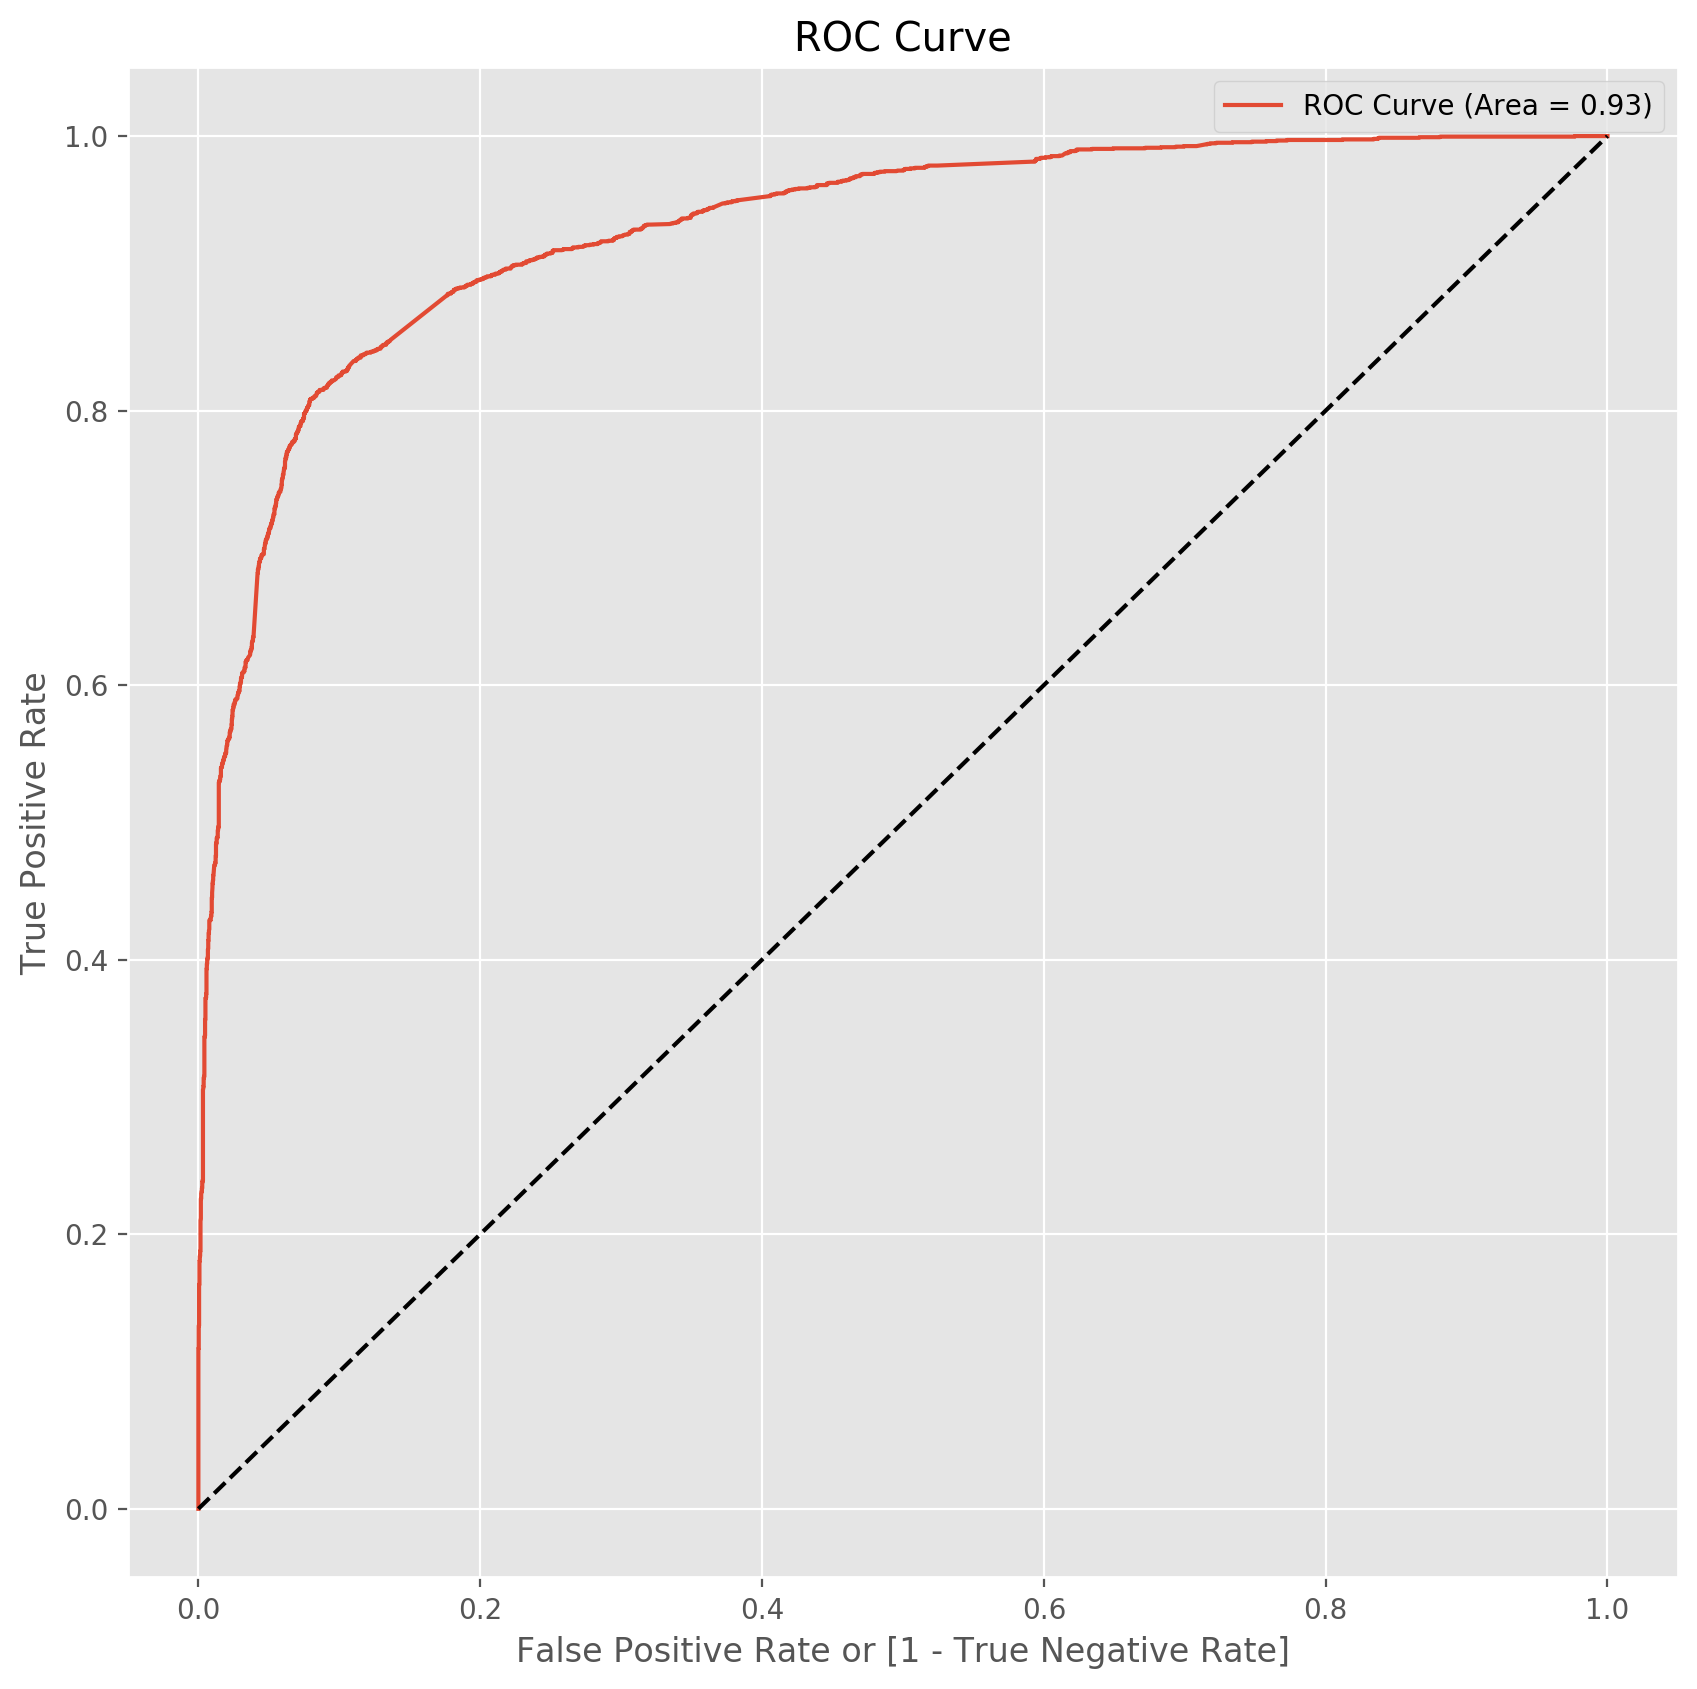

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred["Actual"],y_train_pred["Convert Probability"],
                                         drop_intermediate=False)

auc_score = metrics.roc_auc_score(y_train_pred["Actual"],y_train_pred["Convert Probability"])

fig,ax = plt.subplots(figsize=(10,10),dpi=200)

ax.plot(fpr,tpr,label='ROC Curve (Area = %0.2f)'%auc_score)
ax.plot([0, 1], [0, 1], 'k--')

ax.set_xlabel("False Positive Rate or [1 - True Negative Rate]")
ax.set_ylabel("True Positive Rate")

ax.set_title("ROC Curve")
ax.legend(loc=0)

fig.show()

### Finding the optimal cut-off probability

**Computing `Accuracy`, `Sensitivity` and `Specificity` for various cut-offs**

In [101]:
prob = [float(i)/10 for i in range(10)]

accuracy = []
sensitivity = []
specificity = []
    
for p in prob:
    _, key_metrics,_ = summary_metrics(y_train_pred,p)
    
    accuracy.append(key_metrics["Accuracy"])
    sensitivity.append(key_metrics["Sensitivity (TP/(TP + FN))"])
    specificity.append(key_metrics["Specificity (TN/(TN + FP))"])

cutoff_df = pd.DataFrame(data={"Accuracy":accuracy,"Sensitivity":sensitivity,"Specificity":specificity},
                         index=prob)
cutoff_df.index.name = "Probability"

cutoff_df

,Accuracy,Sensitivity,Specificity
Probability,,,
0.0,0.3813,1.0000,0.0000
0.1,0.7206,0.9619,0.5720
0.2,0.7854,0.9282,0.6974
0.3,0.8355,0.8958,0.7984
0.4,0.8700,0.8289,0.8953
0.5,0.8765,0.7989,0.9243
0.6,0.8666,0.7457,0.9410
0.7,0.8530,0.6829,0.9578
0.8,0.8207,0.5665,0.9773


**<span style = "color:green">We can observe from the above result that as Probability keeps increasing, Accuracy and Specificiity also keep increasing whereas Sensitivity is decreasing.</span>**

**<span style = "color:green">Since the optimal cut-off point is where all three metrics are equal, a plot can be created to see where the these metrics intersect each other.</span>**

**Plotting the above results**

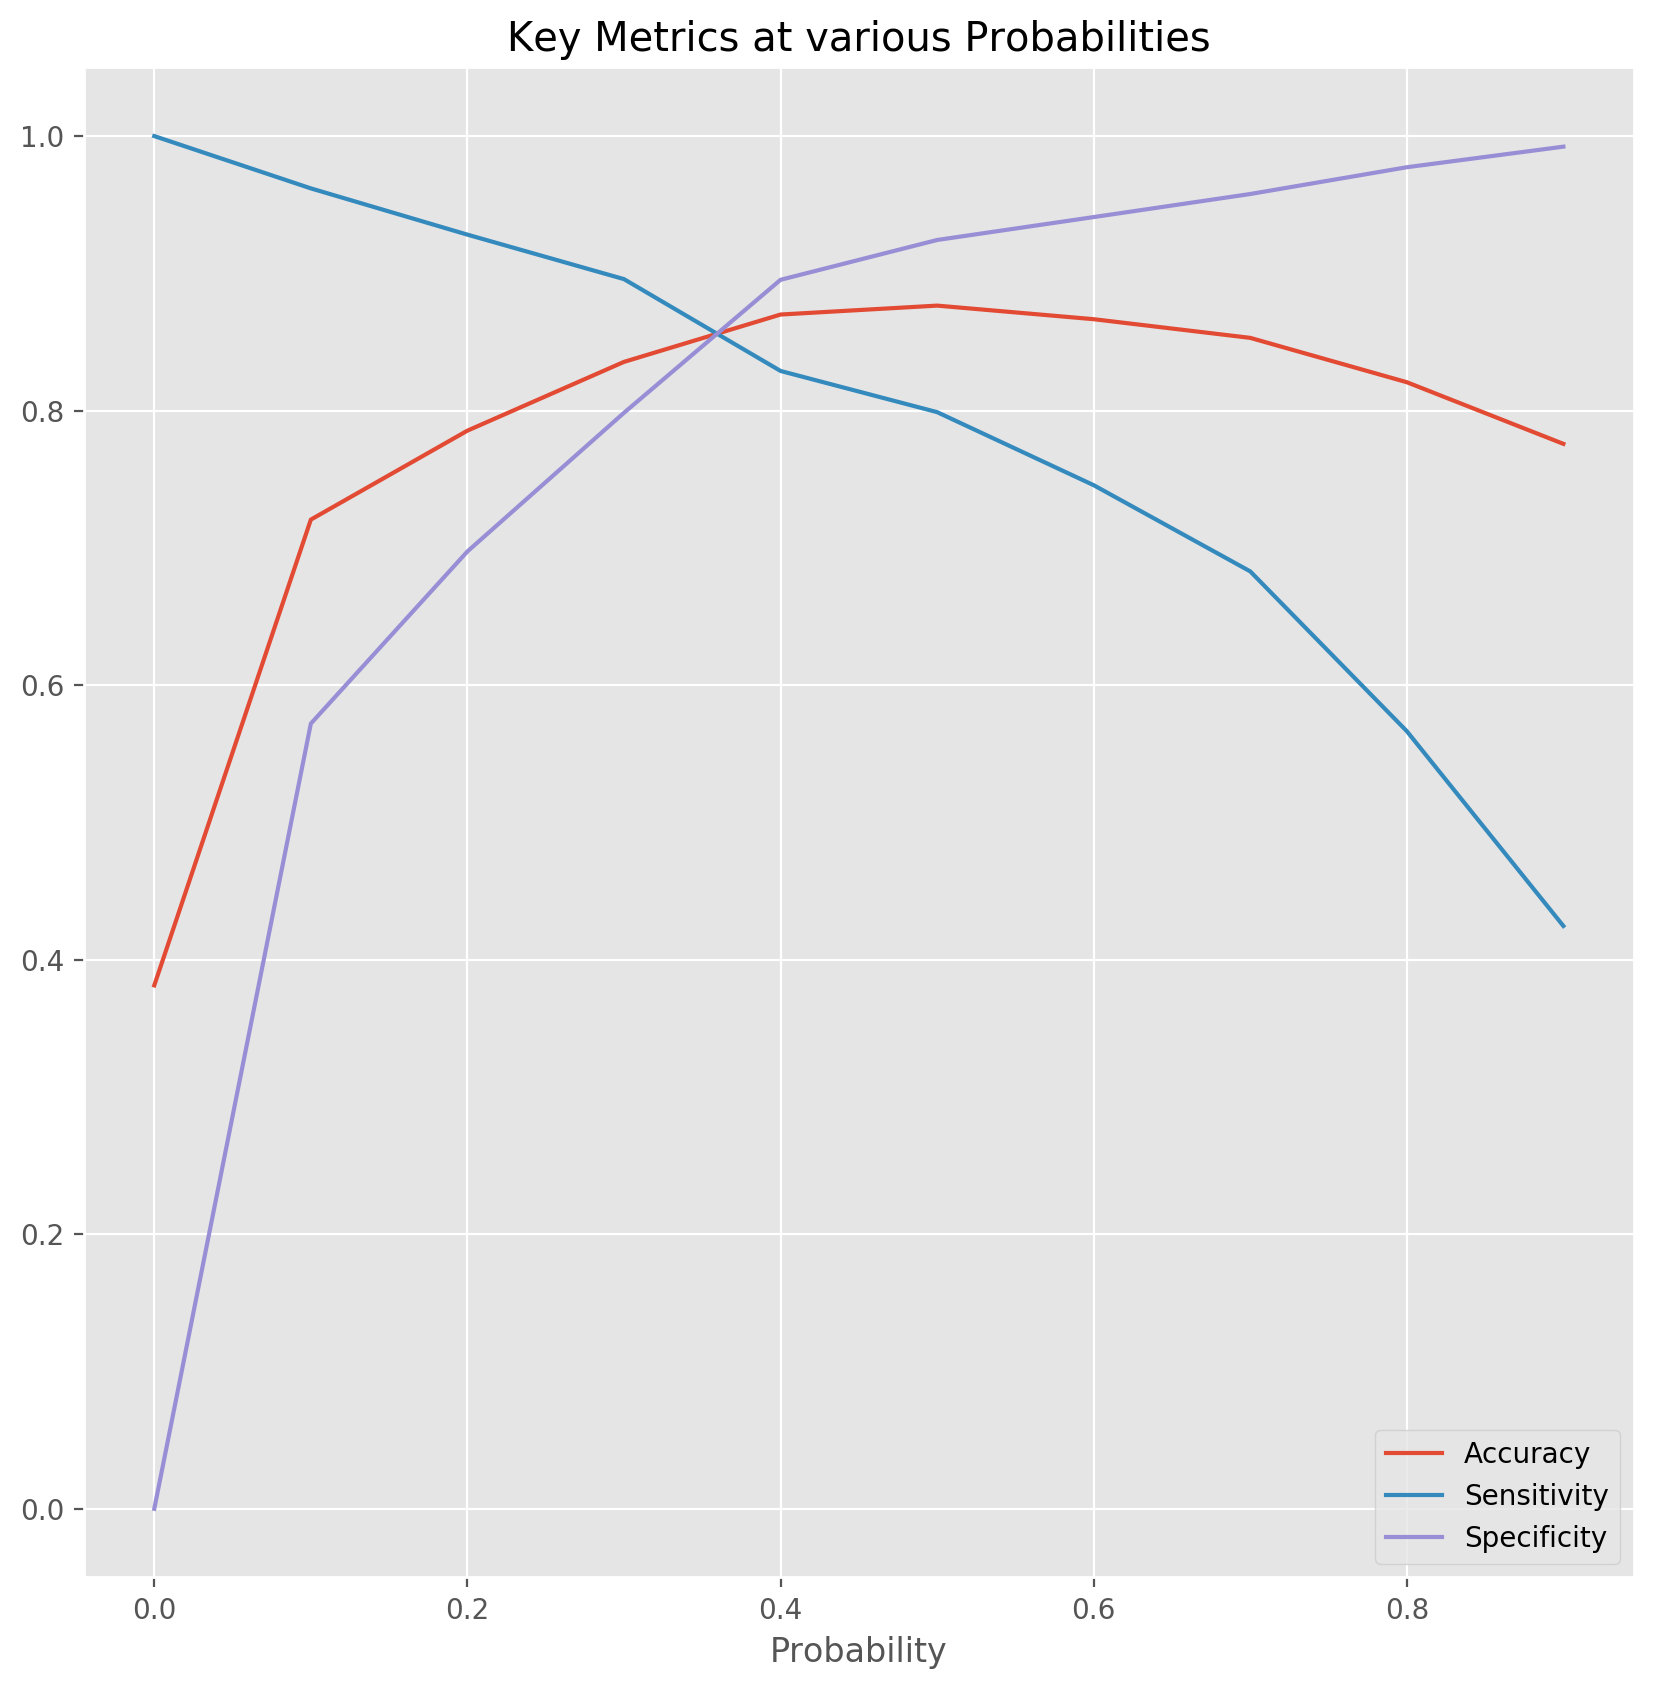

In [102]:
fig,ax = plt.subplots(figsize=(10,10),dpi=200)

ax.plot(cutoff_df["Accuracy"],label="Accuracy")
ax.plot(cutoff_df["Sensitivity"],label="Sensitivity")
ax.plot(cutoff_df["Specificity"],label="Specificity")

ax.set_xlabel("Probability")

ax.set_title("Key Metrics at various Probabilities")
ax.legend(loc=0)

fig.show()

**<span style = "color:green">From the above plot, we can find that all three metrics intersect somewhere close to 0.35, hence the optimal cut-off shall be considered as 0.35</span>**

**Deriving the Summary Metrics @ `0.35`**

In [103]:
confusion_matrix_train, key_metrics_train, other_metrics_train = summary_metrics(y_train_pred,0.35)

**Inspecting the confusion matrix**

In [104]:
confusion_matrix_train

Predicted          
                     Not Converted Converted
Actual Not Converted          3484       518
       Converted               381      2085

**Inspecting other metrics**

In [105]:
for metric in key_metrics_train:
    print(f"{metric}: {key_metrics_train[metric]}",end="\n\n")
for metric in other_metrics_train:
    print(f"{metric}: {other_metrics_train[metric]}",end="\n\n")

Accuracy: 0.861

Sensitivity (TP/(TP + FN)): 0.8455

Specificity (TN/(TN + FP)): 0.8706

False Positive Rate (FP/(TN + FP)): 0.1294

False Negative Rate (FN/(TP + FN)): 0.1545

Positive Predictive Value (TP/(TP + FP)): 0.801

Negative Predictive Value (TN/(TN + FN)): 0.9014



### Commputing the Lead Scores and dropping the unnecessary predictions at other cut-offs

In [106]:
y_train_pred["Lead Score"] = (y_train_pred["Convert Probability"]*100).round(0).astype(int)
y_train_pred["Predict - Final"] = y_train_pred["Predict @ 0.35"]
y_train_pred = y_train_pred[["Lead Index","Actual","Convert Probability","Predict - Final","Lead Score"]]


y_train_pred.head()

,Lead Index,Actual,Convert Probability,Predict - Final,Lead Score
0,1871,0,0.006155,0,1
1,6795,0,0.356487,1,36
2,3516,0,0.007663,0,1
3,8105,0,0.131114,0,13
4,3934,0,0.118781,0,12


## Applying the model on test data

### Scaling `X_test`

In [107]:
X_test["Total Time Spent on Website"] = scaler.transform(X_test[["Total Time Spent on Website"]])

### Retaining columns only present in `X_train`

In [108]:
X_test = X_test[X_train.columns]
X_test.head()

,Total Time Spent on Website,Origin - API,Origin - Landing Page Submission,Source - Chat,Source - Referral,Occupation - Working,Last Activity - Olark Chat Conversation,Last Activity - SMS Sent,Tag - Already a student,Tag - Closed by Horizzon,Tag - Interested in other courses,Tag - Ringing,Tag - Will revert after reading the email,Last Activity Modified
4269,0.964504,1,0,0,0,0,0,1,0,0,0,0,1,0
2376,-0.885371,0,0,0,1,0,0,1,0,0,0,0,1,0
7766,-0.777416,1,0,0,0,1,0,0,0,0,0,0,1,0
9199,-0.885371,1,0,1,0,0,1,0,1,0,0,0,0,1
4359,-0.885371,0,0,0,1,0,0,0,0,0,0,0,1,0


### Fitting the model

**Adding the constant**

In [109]:
X_test_sm = sm.add_constant(X_test)

**Getting the probabilities**

In [110]:
y_test_pred = model_fit.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)

y_test_pred = pd.DataFrame({"Lead Index":y_test.index,"Actual":y_test.values,
                            "Convert Probability":y_test_pred})

y_test_pred.head()

,Lead Index,Actual,Convert Probability
0,4269,1,0.901299
1,2376,1,0.962835
2,7766,1,0.796571
3,9199,0,0.000522
4,4359,1,0.845518


### Evaluating the results

**Deriving the Summary Metrics**

In [111]:
confusion_matrix_test, key_metrics_test, other_metrics_test = summary_metrics(y_test_pred,0.35)

**Inspecting the confusion matrix**

In [112]:
confusion_matrix_test

Predicted          
                     Not Converted Converted
Actual Not Converted          1458       219
       Converted               170       925

**Inspecting other metrics**

In [113]:
for metric in key_metrics_test:
    print(f"{metric}: {key_metrics_test[metric]}",end="\n\n")
for metric in other_metrics_test:
    print(f"{metric}: {other_metrics_test[metric]}",end="\n\n")

Accuracy: 0.8597

Sensitivity (TP/(TP + FN)): 0.8447

Specificity (TN/(TN + FP)): 0.8694

False Positive Rate (FP/(TN + FP)): 0.1306

False Negative Rate (FN/(TP + FN)): 0.1553

Positive Predictive Value (TP/(TP + FP)): 0.8086

Negative Predictive Value (TN/(TN + FN)): 0.8956



**<span style = "color:green">Comparing the above results to that of the train data results, we find that there is not much deviation between the two. Hence, the model has produced identical results on both train and test data.</span>**

### Computing the lead scores

In [114]:
y_test_pred["Lead Score"] = (y_test_pred["Convert Probability"]*100).round(0).astype(int)
y_test_pred["Predict - Final"] = y_test_pred["Predict @ 0.35"]
y_test_pred = y_test_pred[["Lead Index","Actual","Convert Probability","Predict - Final","Lead Score"]]


y_test_pred.head()

,Lead Index,Actual,Convert Probability,Predict - Final,Lead Score
0,4269,1,0.901299,1,90
1,2376,1,0.962835,1,96
2,7766,1,0.796571,1,80
3,9199,0,0.000522,0,0
4,4359,1,0.845518,1,85


## Joining predictions and lead scores to `data`

**Joining the predictions and lead scores obtained from train and test sets**

In [115]:
lead_score = pd.concat([y_train_pred[["Lead Index","Predict - Final","Lead Score"]],
           y_test_pred[["Lead Index","Predict - Final","Lead Score"]]],axis=0).sort_values(by="Lead Index")

lead_score = pd.DataFrame(index=lead_score["Lead Index"].values,
                          data={"Predicted":lead_score["Predict - Final"].values,
                                "Lead Score":lead_score["Lead Score"].values})

lead_score.head()

,Predicted,Lead Score
0,0,1
1,0,1
2,1,83
3,0,0
4,1,51


**Joining `lead_score` and `data`**

In [116]:
data = pd.concat([data,lead_score],axis=1)

data.head()

,Lead Number,Lead Origin,Lead Source,Converted,Total Time Spent on Website,Last Activity,Specialization,Current Occupation,Tags,Free Ebook,Maharashtra,City Category,Last Activity Modified,Predicted,Lead Score
0,660737,API,Chat,0,0,Page Visited on Website,Finance,Unemployed,Interested in other courses,No,Yes,Tier I,Yes,0,1
1,660728,API,Search,0,674,Email Opened,Finance,Unemployed,Ringing,No,Yes,Tier I,No,0,1
2,660727,Landing Page Submission,Direct,1,1532,Email Opened,Other,Student,Will revert after reading the email,Yes,Yes,Tier I,No,1,83
3,660719,Landing Page Submission,Direct,0,305,Other,Other,Unemployed,Ringing,No,Yes,Tier I,Yes,0,0
4,660681,Landing Page Submission,Campaign,1,1428,Converted to Lead,Finance,Unemployed,Will revert after reading the email,No,Yes,Tier I,Yes,1,51


**Checking the Conversion Rate**

In [117]:
act = round(data["Converted"].mean()*100,2)
pred = round(data["Predicted"].mean()*100,2)

print(f"Actual Conversion Rate = {act}%")
print(f"Predicted Conversion Rate = {pred}%")

Actual Conversion Rate = 38.54%
Predicted Conversion Rate = 40.55%


**Plotting a Boxplot of Lead Scores**

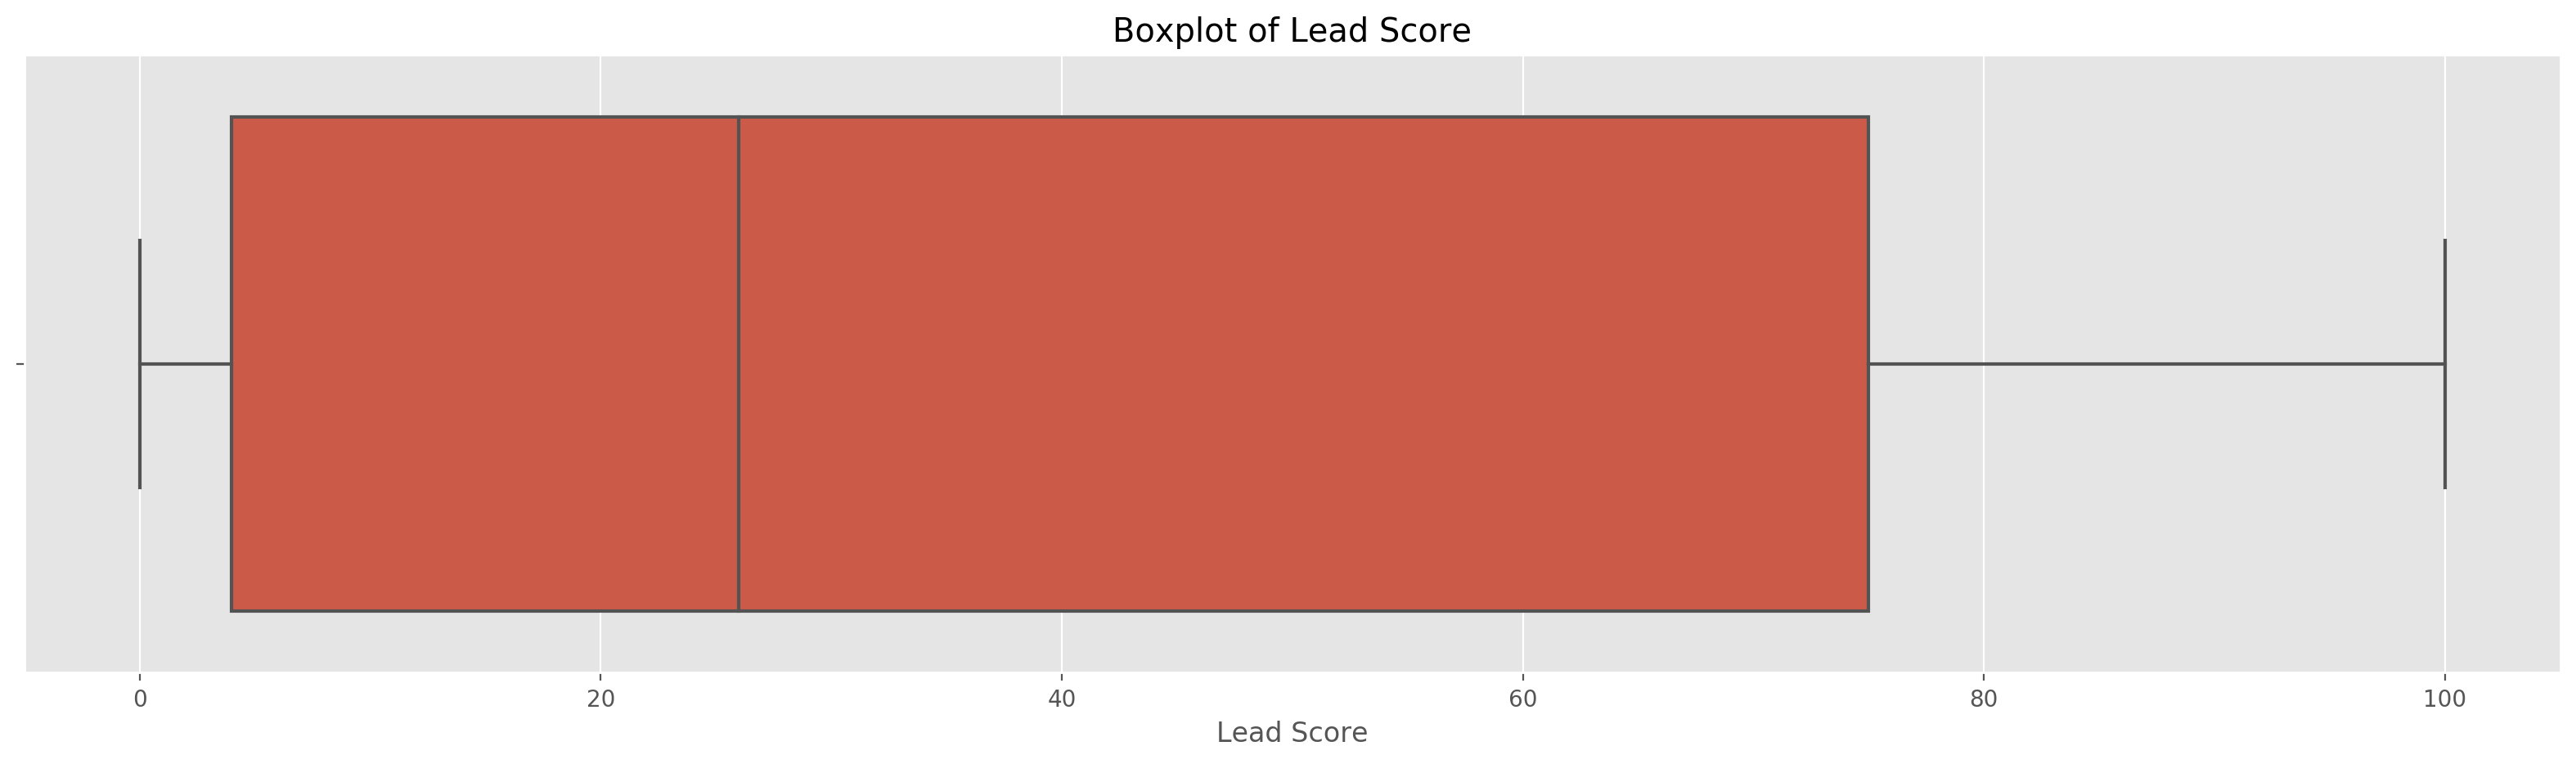

In [118]:
fig,ax = plt.subplots(figsize=(20,5),dpi=200)

sns.boxplot(data["Lead Score"])

ax.set_title("Boxplot of Lead Score")

plt.show()

**<span style = "color:green">From the above boxplot we can understand that around 50% of the observations have lead scores ranging from 5 and 75 with the median Lead Score being somewhere around 25.</span>**

## Conclusion

**<span style = "color:green">Hence, the final equation of the model is given by:</span>**

<span style = "color:green">$ln(\frac {p} {1-p}) = 0.7736 + 6.7436 \times Tag \space - \space Closed \space by \space Horizzon \space  + 2.6905 \times Occupation \space - \space Working \space  + 1.5547 \times Last \space Activity \space - \space SMS \space Sent \space  + 1.1978 \times Tag \space - \space Will \space revert \space after \space reading \space the \space email \space  + 1.1382 \times Total \space Time \space Spent \space on \space Website \space  + 0.7666 \times Source \space - \space Chat \space  + 0.7361 \times Source \space - \space Referral \space  - 0.8176 \times Last \space Activity \space - \space Olark \space Chat \space Conversation \space  - 1.3222 \times Last \space Activity \space Modified \space  - 1.9924 \times Tag \space - \space Interested \space in \space other \space courses \space  - 2.4122 \times Origin \space - \space API \space  - 2.5686 \times Origin \space - \space Landing \space Page \space Submission \space  - 3.2047 \times Tag \space - \space Ringing \space  - 3.5386 \times Tag \space - \space Already \space a \space student$</span>